In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import cv
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import DMatrix
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
df.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [32]:
df.isna().sum() #na değerlerimiz az olduğu için direkt olarak droplayabiliriz.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [33]:
df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
df.nunique() #sex için 3 farklı değer var 2 olması lazım normalde

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    3
dtype: int64

In [35]:
df.sex.value_counts() # . diye bir değer gözüküyor bunu da dropluyorum

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [36]:
df.index[df['sex']=='.']

Int64Index([336], dtype='int64')

In [37]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [38]:
df=df.drop(df.index[df['sex'] == '.'])
df.sex.value_counts()
df=df.reset_index(drop=True)

In [39]:
df['sex'] = df['sex'].replace(['MALE','FEMALE'],[1,0])

In [40]:
X = pd.get_dummies(df.drop('sex',axis=1),drop_first=True)
y = df['sex']
#categorical variableları encode ediyorum. drop_first=True yaparak correlation olmasını engelliyorum.
#örnek: sex_female=0 ise sex_male=1 olmak zorunda zaten. veya 3 categorical değer varsa 2 si değilse zaten 3. değer=1 olmak zorunda

In [41]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
3,36.7,19.3,193.0,3450.0,0,0,0,1
4,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0,1,0,0
329,46.8,14.3,215.0,4850.0,0,1,0,0
330,50.4,15.7,222.0,5750.0,0,1,0,0
331,45.2,14.8,212.0,5200.0,0,1,0,0


In [42]:
y

0      1
1      0
2      0
3      0
4      1
      ..
328    0
329    0
330    1
331    0
332    1
Name: sex, Length: 333, dtype: int64

## Random Forest

#### Base Model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model_base = RandomForestClassifier(n_estimators=10, bootstrap=False,random_state=42)

In [45]:
scores_base =cross_val_score(model_base,X_train,y_train,scoring='accuracy',cv=5)
#kendi içinde cv yaparken x train ve y traini validation ve training olarak tekrar bölüyor zaten.
#train validate test splitlerimiz oluşmuş oluyor.
scores_base

array([0.96296296, 0.8490566 , 0.86792453, 0.88679245, 0.8490566 ])

In [46]:
rf_base_train= scores_base.mean()
rf_base_train
#rf accuracy on training set before tune

0.8831586303284418

#### Tuned Model

In [47]:
model_tuned = RandomForestClassifier(random_state=42)

In [48]:
grid_params = {'criterion': ['entropy', 'gini'],
               'max_depth': [1,3,5] + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [2,8],
               'min_samples_split': [2,5],
               'n_estimators': [50,100]}


In [49]:
grid_model = GridSearchCV(estimator=model_tuned,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [50]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [51]:
grid_model.best_estimator_.get_params()
#aradığımız parametrelerden en iyi sonucu veren kombinasyonu listeler

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [52]:
scores_grid =cross_val_score(grid_model.best_estimator_,X_train,y_train,scoring='accuracy',cv=5)
scores_grid


array([0.94444444, 0.83018868, 0.9245283 , 0.94339623, 0.9245283 ])

In [53]:
rf_tuned_train= scores_grid.mean()#rf accuracy on training set after tune
rf_tuned_train

0.9134171907756814

In [54]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
culmen_depth_mm,0.302312
body_mass_g,0.298615
culmen_length_mm,0.197694
flipper_length_mm,0.142267
species_Gentoo,0.025642
island_Dream,0.014809
species_Chinstrap,0.013407
island_Torgersen,0.005255


In [55]:
grid_model.best_score_ #cv yaparak mean score veriyor demek ki
#0.88 den 0.91 e yükselttik
#test setine uygulayabiliriz

0.9134171907756814

In [56]:
y_pred_final = grid_model.predict(X_test) #test setine uyguluyoruz

In [57]:
rf_tuned_test= accuracy_score(y_test, y_pred_final)
#hiç görmediği test setinde %86 accuracy değerine ulaştık

### More Methods

In [58]:
clfNew = DecisionTreeClassifier(random_state=42)
bgcNew = BaggingClassifier(base_estimator=clfNew, n_estimators=10, random_state=42)
abcNew = AdaBoostClassifier(n_estimators=10, random_state=42)
sgbNew = GradientBoostingClassifier(n_estimators=10, random_state=42)

In [59]:
bgc_cv_score = cross_val_score(bgcNew, X_train, y_train, cv=5, scoring='accuracy')
bgc_base_train=bgc_cv_score.mean()
print("Mean accuracy Score - BAG: ", bgc_cv_score.mean())

abc_cv_score = cross_val_score(abcNew, X_train, y_train, cv=5, scoring='accuracy')
abc_base_train=abc_cv_score.mean()
print("Mean accuracy Score - ADA: ", abc_cv_score.mean())

sgb_cv_score = cross_val_score(sgbNew, X_train, y_train, cv=5, scoring='accuracy')
gbc_base_train=sgb_cv_score.mean()
print("Mean accuracy Score - GBC: ", sgb_cv_score.mean())

Mean accuracy Score - BAG:  0.9059399021663174
Mean accuracy Score - ADA:  0.8795946890286513
Mean accuracy Score - GBC:  0.9020265548567435


## Bagging Tuned

In [60]:
bgc= BaggingClassifier(base_estimator=clfNew)

In [61]:
grid_params = {
               'max_samples': [31,32,33,34,35],
               'max_features': [1,4,5,6],
               'n_estimators': [10,50,100,200],
                'random_state':[42]
}


In [62]:
grid_model = GridSearchCV(estimator=bgc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [63]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'max_features': [1, 4, 5, 6],
                         'max_samples': [31, 32, 33, 34, 35],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [64]:
grid_model.best_params_

{'max_features': 5, 'max_samples': 33, 'n_estimators': 50, 'random_state': 42}

In [65]:
bgc_tuned_train=grid_model.best_score_ #bagging accuracy on training set after tuned
bgc_tuned_train

0.9322152341020267

In [66]:
y_pred_bagg = grid_model.predict(X_test)
bgc_tuned_test= accuracy_score(y_test, y_pred_bagg)
bgc_tuned_test
#bagging accuracy on test set after tuned

0.8507462686567164

## GradientBoosting Tuned

In [67]:
gbc = GradientBoostingClassifier(random_state=42)

In [68]:
grid_params = {
               'loss':['exponential'],
                'n_estimators': [100,200],
               'max_features': [7,8],
                'subsample': [0.2,0.3],
                'learning_rate': [0.9,1],
                'criterion': ['friedman_mse'],
                'min_samples_split': [5,6],
                'min_samples_leaf': [2,3],
                'max_depth':[5,6],
                'random_state':[42]
}


In [69]:
grid_model = GridSearchCV(estimator=gbc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [70]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.9, 1], 'loss': ['exponential'],
                         'max_depth': [5, 6], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6],
                         'n_estimators': [100, 200], 'random_state': [42],
                         'subsample': [0.2, 0.3]},
             scoring='accuracy', verbose=1)

In [71]:
grid_model.best_params_


{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 42,
 'subsample': 0.2}

In [72]:
gbc_tuned_training = grid_model.best_score_ #gradientboost accuracy on training after tuned
gbc_tuned_training

0.9322152341020266

In [73]:
y_pred_gbc = grid_model.predict(X_test)
gbc_tuned_test=accuracy_score(y_test, y_pred_gbc)
#gradientboost accuracy on test set after tuned

## AdaptiveBoost Tuned


In [74]:
abc= AdaBoostClassifier(random_state=42)

In [75]:
grid_params = {
               'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5],
               'algorithm': ['SAMME','SAMME.R'],
               'n_estimators': [10,50,100,200],
                'random_state':[42]
}


In [76]:
grid_model = GridSearchCV(estimator=abc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=0)

In [77]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]},
             scoring='accuracy')

In [78]:
grid_model.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 100,
 'random_state': 42}

In [79]:
ada_tuned_train=grid_model.best_score_
ada_tuned_train

0.9322152341020266

In [80]:
y_pred_abc = grid_model.predict(X_test)
ada_tuned_test=accuracy_score(y_test, y_pred_abc)
ada_tuned_test

0.8955223880597015

## XGBoost

#### Base Xgb Model without CV



In [81]:
from xgboost import plot_importance


In [82]:
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 1.0,
            'n_estimators':100,
            'seed':42
        }

In [83]:
xgb_clf = XGBClassifier(**params,eval_metric='error')
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [84]:
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred_xgb) #test setinde 0.91 accuracy without CV

0.9104477611940298

#### XGB with CV

In [85]:
params = {'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 1.0,
            'n_estimators':100,
            'seed':42}


In [86]:
xgb_clf = XGBClassifier(**params)
xgb_cv_scores= cross_val_score(xgb_clf, X=X_train, y=y_train, scoring="accuracy", cv=5)

[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [87]:
xgb_base_train=xgb_cv_scores.mean() #xgb mean accuracy on training set with CV
xgb_base_train

0.9020964360587002

### XGBoost Tuned

In [88]:
xgb= XGBClassifier()

In [89]:
xgb_params= {'objective':['binary:logistic'],
            'max_depth': [5,10,15],
            'learning_rate': [0.1, 0.2, 0.5, 1],
            'n_estimators': [100,200],
            'seed':[42]}

In [90]:
grid_model = GridSearchCV(estimator=xgb,
                          param_grid=xgb_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [91]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used w

[18:31:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:31:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:31:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:31:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:31:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [92]:
xgb_tuned_train=grid_model.best_score_ # mean accuracy of XGBoost on training set after tune with CV
xgb_tuned_train

0.9134171907756814

In [93]:
grid_model.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'seed': 42}

In [94]:
y_pred_xgb= grid_model.predict(X_test)

In [95]:
accuracy_xgb_test =accuracy_score(y_pred_xgb,y_test) #xgb mean accuracy on test set
xgb_tuned_test=accuracy_xgb_test
xgb_tuned_test

0.8805970149253731

In [96]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
body_mass_g,0.405970
culmen_depth_mm,0.275563
species_Chinstrap,0.132674
culmen_length_mm,0.118166
island_Dream,0.033929
flipper_length_mm,0.033697
species_Gentoo,0.000000
island_Torgersen,0.000000


## LightGBM


In [97]:
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm_cv_scores= cross_val_score(lgbm, X=X_train, y=y_train, scoring="accuracy", cv=5)
lgbm_base_train=lgbm_cv_scores.mean() # lgbm accuracy on training set with CV

#### LightGBM Tuned

In [98]:
lgbm_params={
        'boosting_type':['gbdt','goss','rf'],
        'learning_rate': [0.01,0.05, 0.1, 0.15],
        'random_state': [42],
        'min_split_gain': [0,2,4,6,8,10],
        'min_child_samples':[10,20,30],
        'num_leaves':[31,40,50],
        'random_state':[42]
            }

In [99]:
lgbm_clf = lgb.LGBMClassifier()

In [100]:
grid_model = GridSearchCV(estimator=lgbm_clf,
                          param_grid=lgbm_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=0)

In [101]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'goss', 'rf'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'min_child_samples': [10, 20, 30],
                         'min_split_gain': [0, 2, 4, 6, 8, 10],
                         'num_leaves': [31, 40, 50], 'random_state': [42]},
             scoring='accuracy')

In [102]:
lgbm_tuned_train=grid_model.best_score_
lgbm_tuned_train
# lightgbm mean accuracy on training set after tuned

0.9323549965059399

In [103]:
grid_model.best_params_

{'boosting_type': 'goss',
 'learning_rate': 0.05,
 'min_child_samples': 10,
 'min_split_gain': 2,
 'num_leaves': 31,
 'random_state': 42}

In [104]:
y_pred_lgbm= grid_model.predict(X_test)
lgbm_tuned_test=accuracy_score(y_test,y_pred_lgbm)
lgbm_tuned_test
#lgbm accuracy on test set after tuned



0.8805970149253731

In [105]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
body_mass_g,117
culmen_depth_mm,113
culmen_length_mm,97
flipper_length_mm,22
species_Chinstrap,6
species_Gentoo,0
island_Dream,0
island_Torgersen,0


## CatBoost

In [120]:
cb_clf = CatBoostClassifier(random_state=42,logging_level=None,verbose=None)



In [121]:
cb_cv_scores= cross_val_score(cb_clf, X=X_train, y=y_train, scoring="accuracy", cv=5)

Learning rate set to 0.005312
0:	learn: 0.6890246	total: 4.06ms	remaining: 4.05s
1:	learn: 0.6844541	total: 10.4ms	remaining: 5.21s
2:	learn: 0.6793172	total: 12.9ms	remaining: 4.29s
3:	learn: 0.6756971	total: 15ms	remaining: 3.73s
4:	learn: 0.6709144	total: 17ms	remaining: 3.37s
5:	learn: 0.6672429	total: 18.6ms	remaining: 3.08s
6:	learn: 0.6617925	total: 20.1ms	remaining: 2.85s
7:	learn: 0.6575154	total: 24ms	remaining: 2.98s
8:	learn: 0.6536252	total: 25.2ms	remaining: 2.77s
9:	learn: 0.6484575	total: 26.4ms	remaining: 2.61s
10:	learn: 0.6441618	total: 27.7ms	remaining: 2.49s
11:	learn: 0.6401792	total: 28.8ms	remaining: 2.37s
12:	learn: 0.6361408	total: 30.3ms	remaining: 2.3s
13:	learn: 0.6323321	total: 31.9ms	remaining: 2.25s
14:	learn: 0.6277788	total: 33.1ms	remaining: 2.17s
15:	learn: 0.6234986	total: 34.3ms	remaining: 2.11s
16:	learn: 0.6201836	total: 36.6ms	remaining: 2.12s
17:	learn: 0.6165519	total: 38.1ms	remaining: 2.08s
18:	learn: 0.6124120	total: 40ms	remaining: 2.06s
1

214:	learn: 0.2577329	total: 720ms	remaining: 2.63s
215:	learn: 0.2569410	total: 722ms	remaining: 2.62s
216:	learn: 0.2562080	total: 723ms	remaining: 2.61s
217:	learn: 0.2552302	total: 725ms	remaining: 2.6s
218:	learn: 0.2547059	total: 728ms	remaining: 2.6s
219:	learn: 0.2543452	total: 729ms	remaining: 2.58s
220:	learn: 0.2535902	total: 730ms	remaining: 2.57s
221:	learn: 0.2526658	total: 731ms	remaining: 2.56s
222:	learn: 0.2518289	total: 739ms	remaining: 2.57s
223:	learn: 0.2512161	total: 741ms	remaining: 2.56s
224:	learn: 0.2504929	total: 743ms	remaining: 2.56s
225:	learn: 0.2497894	total: 744ms	remaining: 2.55s
226:	learn: 0.2490434	total: 745ms	remaining: 2.54s
227:	learn: 0.2482765	total: 748ms	remaining: 2.53s
228:	learn: 0.2471756	total: 750ms	remaining: 2.52s
229:	learn: 0.2467323	total: 752ms	remaining: 2.52s
230:	learn: 0.2461637	total: 754ms	remaining: 2.51s
231:	learn: 0.2452780	total: 756ms	remaining: 2.5s
232:	learn: 0.2443608	total: 759ms	remaining: 2.5s
233:	learn: 0.24

446:	learn: 0.1587787	total: 1.28s	remaining: 1.58s
447:	learn: 0.1585230	total: 1.28s	remaining: 1.58s
448:	learn: 0.1583009	total: 1.28s	remaining: 1.58s
449:	learn: 0.1580124	total: 1.29s	remaining: 1.58s
450:	learn: 0.1578506	total: 1.29s	remaining: 1.57s
451:	learn: 0.1574883	total: 1.29s	remaining: 1.57s
452:	learn: 0.1573793	total: 1.3s	remaining: 1.57s
453:	learn: 0.1572695	total: 1.3s	remaining: 1.57s
454:	learn: 0.1569527	total: 1.31s	remaining: 1.57s
455:	learn: 0.1566109	total: 1.31s	remaining: 1.56s
456:	learn: 0.1563754	total: 1.31s	remaining: 1.56s
457:	learn: 0.1558360	total: 1.31s	remaining: 1.55s
458:	learn: 0.1554828	total: 1.31s	remaining: 1.55s
459:	learn: 0.1551841	total: 1.32s	remaining: 1.55s
460:	learn: 0.1549865	total: 1.32s	remaining: 1.54s
461:	learn: 0.1548132	total: 1.32s	remaining: 1.54s
462:	learn: 0.1545059	total: 1.33s	remaining: 1.54s
463:	learn: 0.1543249	total: 1.33s	remaining: 1.53s
464:	learn: 0.1540578	total: 1.33s	remaining: 1.53s
465:	learn: 0.

627:	learn: 0.1233501	total: 1.62s	remaining: 960ms
628:	learn: 0.1231765	total: 1.62s	remaining: 958ms
629:	learn: 0.1230821	total: 1.62s	remaining: 954ms
630:	learn: 0.1229426	total: 1.63s	remaining: 951ms
631:	learn: 0.1228146	total: 1.63s	remaining: 948ms
632:	learn: 0.1226858	total: 1.63s	remaining: 945ms
633:	learn: 0.1224970	total: 1.64s	remaining: 946ms
634:	learn: 0.1223537	total: 1.64s	remaining: 945ms
635:	learn: 0.1221738	total: 1.65s	remaining: 944ms
636:	learn: 0.1220767	total: 1.65s	remaining: 940ms
637:	learn: 0.1219991	total: 1.65s	remaining: 937ms
638:	learn: 0.1218003	total: 1.66s	remaining: 936ms
639:	learn: 0.1216599	total: 1.66s	remaining: 933ms
640:	learn: 0.1215575	total: 1.66s	remaining: 930ms
641:	learn: 0.1213127	total: 1.67s	remaining: 929ms
642:	learn: 0.1211862	total: 1.67s	remaining: 927ms
643:	learn: 0.1210414	total: 1.67s	remaining: 924ms
644:	learn: 0.1209556	total: 1.67s	remaining: 921ms
645:	learn: 0.1208112	total: 1.67s	remaining: 917ms
646:	learn: 

793:	learn: 0.1003621	total: 1.96s	remaining: 509ms
794:	learn: 0.1002946	total: 1.96s	remaining: 507ms
795:	learn: 0.1001360	total: 1.97s	remaining: 505ms
796:	learn: 0.0998977	total: 1.97s	remaining: 502ms
797:	learn: 0.0998177	total: 1.97s	remaining: 499ms
798:	learn: 0.0997072	total: 1.98s	remaining: 498ms
799:	learn: 0.0996201	total: 1.98s	remaining: 496ms
800:	learn: 0.0995161	total: 1.98s	remaining: 493ms
801:	learn: 0.0994116	total: 1.99s	remaining: 490ms
802:	learn: 0.0992582	total: 1.99s	remaining: 488ms
803:	learn: 0.0992089	total: 1.99s	remaining: 485ms
804:	learn: 0.0991069	total: 2s	remaining: 483ms
805:	learn: 0.0989740	total: 2s	remaining: 481ms
806:	learn: 0.0988387	total: 2s	remaining: 479ms
807:	learn: 0.0986919	total: 2s	remaining: 476ms
808:	learn: 0.0985249	total: 2.01s	remaining: 475ms
809:	learn: 0.0984093	total: 2.02s	remaining: 473ms
810:	learn: 0.0983097	total: 2.02s	remaining: 470ms
811:	learn: 0.0981851	total: 2.02s	remaining: 468ms
812:	learn: 0.0980533	to

956:	learn: 0.0834259	total: 2.29s	remaining: 103ms
957:	learn: 0.0833353	total: 2.3s	remaining: 101ms
958:	learn: 0.0832259	total: 2.31s	remaining: 98.7ms
959:	learn: 0.0831068	total: 2.31s	remaining: 96.3ms
960:	learn: 0.0830062	total: 2.31s	remaining: 93.8ms
961:	learn: 0.0829363	total: 2.31s	remaining: 91.4ms
962:	learn: 0.0828123	total: 2.32s	remaining: 89.1ms
963:	learn: 0.0826882	total: 2.32s	remaining: 86.7ms
964:	learn: 0.0825518	total: 2.32s	remaining: 84.3ms
965:	learn: 0.0824294	total: 2.33s	remaining: 82ms
966:	learn: 0.0823680	total: 2.33s	remaining: 79.6ms
967:	learn: 0.0823104	total: 2.33s	remaining: 77.2ms
968:	learn: 0.0821897	total: 2.34s	remaining: 74.8ms
969:	learn: 0.0821391	total: 2.34s	remaining: 72.3ms
970:	learn: 0.0820550	total: 2.34s	remaining: 70ms
971:	learn: 0.0819671	total: 2.34s	remaining: 67.5ms
972:	learn: 0.0818788	total: 2.35s	remaining: 65.1ms
973:	learn: 0.0817780	total: 2.35s	remaining: 62.6ms
974:	learn: 0.0817174	total: 2.35s	remaining: 60.2ms


141:	learn: 0.3103828	total: 376ms	remaining: 2.27s
142:	learn: 0.3090657	total: 379ms	remaining: 2.27s
143:	learn: 0.3075682	total: 380ms	remaining: 2.26s
144:	learn: 0.3062227	total: 386ms	remaining: 2.27s
145:	learn: 0.3049667	total: 388ms	remaining: 2.27s
146:	learn: 0.3038687	total: 407ms	remaining: 2.36s
147:	learn: 0.3031744	total: 411ms	remaining: 2.37s
148:	learn: 0.3019170	total: 413ms	remaining: 2.36s
149:	learn: 0.3013980	total: 415ms	remaining: 2.35s
150:	learn: 0.3002799	total: 422ms	remaining: 2.38s
151:	learn: 0.2992532	total: 425ms	remaining: 2.37s
152:	learn: 0.2976142	total: 427ms	remaining: 2.36s
153:	learn: 0.2962113	total: 429ms	remaining: 2.35s
154:	learn: 0.2953734	total: 432ms	remaining: 2.35s
155:	learn: 0.2940835	total: 449ms	remaining: 2.43s
156:	learn: 0.2932576	total: 451ms	remaining: 2.42s
157:	learn: 0.2921927	total: 455ms	remaining: 2.42s
158:	learn: 0.2910368	total: 458ms	remaining: 2.42s
159:	learn: 0.2892212	total: 460ms	remaining: 2.41s
160:	learn: 

333:	learn: 0.1739995	total: 1.04s	remaining: 2.08s
334:	learn: 0.1737144	total: 1.05s	remaining: 2.08s
335:	learn: 0.1733847	total: 1.05s	remaining: 2.07s
336:	learn: 0.1729933	total: 1.05s	remaining: 2.07s
337:	learn: 0.1727445	total: 1.05s	remaining: 2.06s
338:	learn: 0.1723972	total: 1.05s	remaining: 2.06s
339:	learn: 0.1720127	total: 1.06s	remaining: 2.05s
340:	learn: 0.1717614	total: 1.06s	remaining: 2.04s
341:	learn: 0.1713921	total: 1.07s	remaining: 2.05s
342:	learn: 0.1709626	total: 1.07s	remaining: 2.05s
343:	learn: 0.1708087	total: 1.08s	remaining: 2.05s
344:	learn: 0.1703823	total: 1.08s	remaining: 2.05s
345:	learn: 0.1700778	total: 1.08s	remaining: 2.05s
346:	learn: 0.1697261	total: 1.09s	remaining: 2.04s
347:	learn: 0.1694786	total: 1.09s	remaining: 2.04s
348:	learn: 0.1692255	total: 1.09s	remaining: 2.04s
349:	learn: 0.1687524	total: 1.09s	remaining: 2.03s
350:	learn: 0.1681707	total: 1.1s	remaining: 2.03s
351:	learn: 0.1679049	total: 1.11s	remaining: 2.05s
352:	learn: 0

498:	learn: 0.1303492	total: 1.71s	remaining: 1.72s
499:	learn: 0.1302351	total: 1.72s	remaining: 1.72s
500:	learn: 0.1299836	total: 1.72s	remaining: 1.71s
501:	learn: 0.1298330	total: 1.74s	remaining: 1.73s
502:	learn: 0.1297237	total: 1.75s	remaining: 1.73s
503:	learn: 0.1294868	total: 1.75s	remaining: 1.72s
504:	learn: 0.1293378	total: 1.75s	remaining: 1.72s
505:	learn: 0.1291164	total: 1.76s	remaining: 1.72s
506:	learn: 0.1288696	total: 1.82s	remaining: 1.77s
507:	learn: 0.1286992	total: 1.83s	remaining: 1.77s
508:	learn: 0.1284981	total: 1.83s	remaining: 1.77s
509:	learn: 0.1283621	total: 1.84s	remaining: 1.76s
510:	learn: 0.1282127	total: 1.84s	remaining: 1.76s
511:	learn: 0.1279682	total: 1.85s	remaining: 1.76s
512:	learn: 0.1278093	total: 1.85s	remaining: 1.76s
513:	learn: 0.1275932	total: 1.85s	remaining: 1.75s
514:	learn: 0.1274717	total: 1.85s	remaining: 1.75s
515:	learn: 0.1272900	total: 1.86s	remaining: 1.74s
516:	learn: 0.1271065	total: 1.86s	remaining: 1.74s
517:	learn: 

673:	learn: 0.1025518	total: 2.75s	remaining: 1.33s
674:	learn: 0.1024023	total: 2.76s	remaining: 1.33s
675:	learn: 0.1022448	total: 2.76s	remaining: 1.32s
676:	learn: 0.1021541	total: 2.79s	remaining: 1.33s
677:	learn: 0.1019361	total: 2.79s	remaining: 1.33s
678:	learn: 0.1017851	total: 2.81s	remaining: 1.33s
679:	learn: 0.1017146	total: 2.82s	remaining: 1.32s
680:	learn: 0.1016323	total: 2.82s	remaining: 1.32s
681:	learn: 0.1015401	total: 2.83s	remaining: 1.32s
682:	learn: 0.1014056	total: 2.84s	remaining: 1.32s
683:	learn: 0.1013085	total: 2.84s	remaining: 1.31s
684:	learn: 0.1011240	total: 2.85s	remaining: 1.31s
685:	learn: 0.1010318	total: 2.85s	remaining: 1.3s
686:	learn: 0.1009663	total: 2.86s	remaining: 1.3s
687:	learn: 0.1008369	total: 2.86s	remaining: 1.3s
688:	learn: 0.1006777	total: 2.86s	remaining: 1.29s
689:	learn: 0.1005290	total: 2.86s	remaining: 1.29s
690:	learn: 0.1003677	total: 2.87s	remaining: 1.28s
691:	learn: 0.1002411	total: 2.87s	remaining: 1.28s
692:	learn: 0.1

838:	learn: 0.0823107	total: 3.64s	remaining: 698ms
839:	learn: 0.0822119	total: 3.64s	remaining: 693ms
840:	learn: 0.0821184	total: 3.64s	remaining: 688ms
841:	learn: 0.0820613	total: 3.64s	remaining: 684ms
842:	learn: 0.0820115	total: 3.65s	remaining: 681ms
843:	learn: 0.0818682	total: 3.66s	remaining: 676ms
844:	learn: 0.0817828	total: 3.66s	remaining: 671ms
845:	learn: 0.0817253	total: 3.66s	remaining: 666ms
846:	learn: 0.0815464	total: 3.66s	remaining: 662ms
847:	learn: 0.0814571	total: 3.66s	remaining: 657ms
848:	learn: 0.0813958	total: 3.67s	remaining: 652ms
849:	learn: 0.0812953	total: 3.67s	remaining: 647ms
850:	learn: 0.0811888	total: 3.67s	remaining: 643ms
851:	learn: 0.0810877	total: 3.67s	remaining: 638ms
852:	learn: 0.0810288	total: 3.68s	remaining: 634ms
853:	learn: 0.0808533	total: 3.68s	remaining: 630ms
854:	learn: 0.0807286	total: 3.69s	remaining: 625ms
855:	learn: 0.0806787	total: 3.69s	remaining: 621ms
856:	learn: 0.0805625	total: 3.69s	remaining: 616ms
857:	learn: 

9:	learn: 0.6458162	total: 96.2ms	remaining: 9.52s
10:	learn: 0.6420718	total: 101ms	remaining: 9.08s
11:	learn: 0.6367899	total: 104ms	remaining: 8.58s
12:	learn: 0.6325829	total: 126ms	remaining: 9.57s
13:	learn: 0.6287919	total: 128ms	remaining: 9.01s
14:	learn: 0.6248063	total: 165ms	remaining: 10.8s
15:	learn: 0.6205736	total: 177ms	remaining: 10.9s
16:	learn: 0.6163585	total: 181ms	remaining: 10.5s
17:	learn: 0.6115994	total: 185ms	remaining: 10.1s
18:	learn: 0.6083885	total: 190ms	remaining: 9.79s
19:	learn: 0.6044337	total: 191ms	remaining: 9.38s
20:	learn: 0.6001528	total: 195ms	remaining: 9.08s
21:	learn: 0.5959189	total: 216ms	remaining: 9.59s
22:	learn: 0.5930127	total: 226ms	remaining: 9.61s
23:	learn: 0.5899919	total: 228ms	remaining: 9.29s
24:	learn: 0.5871599	total: 233ms	remaining: 9.07s
25:	learn: 0.5825166	total: 237ms	remaining: 8.89s
26:	learn: 0.5788495	total: 240ms	remaining: 8.64s
27:	learn: 0.5749292	total: 242ms	remaining: 8.41s
28:	learn: 0.5704871	total: 244

207:	learn: 0.2379669	total: 773ms	remaining: 2.94s
208:	learn: 0.2372012	total: 781ms	remaining: 2.96s
209:	learn: 0.2363514	total: 790ms	remaining: 2.97s
210:	learn: 0.2353565	total: 792ms	remaining: 2.96s
211:	learn: 0.2345235	total: 796ms	remaining: 2.96s
212:	learn: 0.2338812	total: 798ms	remaining: 2.95s
213:	learn: 0.2333727	total: 801ms	remaining: 2.94s
214:	learn: 0.2326185	total: 803ms	remaining: 2.93s
215:	learn: 0.2315910	total: 804ms	remaining: 2.92s
216:	learn: 0.2305025	total: 806ms	remaining: 2.91s
217:	learn: 0.2297883	total: 807ms	remaining: 2.9s
218:	learn: 0.2288554	total: 809ms	remaining: 2.88s
219:	learn: 0.2282413	total: 811ms	remaining: 2.87s
220:	learn: 0.2276047	total: 812ms	remaining: 2.86s
221:	learn: 0.2267804	total: 813ms	remaining: 2.85s
222:	learn: 0.2262014	total: 815ms	remaining: 2.84s
223:	learn: 0.2257446	total: 819ms	remaining: 2.84s
224:	learn: 0.2250412	total: 820ms	remaining: 2.83s
225:	learn: 0.2242990	total: 822ms	remaining: 2.81s
226:	learn: 0

369:	learn: 0.1554136	total: 1.1s	remaining: 1.88s
370:	learn: 0.1550507	total: 1.11s	remaining: 1.88s
371:	learn: 0.1548194	total: 1.11s	remaining: 1.87s
372:	learn: 0.1546409	total: 1.11s	remaining: 1.87s
373:	learn: 0.1544003	total: 1.11s	remaining: 1.86s
374:	learn: 0.1541266	total: 1.11s	remaining: 1.86s
375:	learn: 0.1537903	total: 1.12s	remaining: 1.85s
376:	learn: 0.1535312	total: 1.12s	remaining: 1.85s
377:	learn: 0.1532065	total: 1.12s	remaining: 1.84s
378:	learn: 0.1528565	total: 1.12s	remaining: 1.84s
379:	learn: 0.1526179	total: 1.13s	remaining: 1.83s
380:	learn: 0.1522781	total: 1.13s	remaining: 1.83s
381:	learn: 0.1519127	total: 1.13s	remaining: 1.83s
382:	learn: 0.1516621	total: 1.13s	remaining: 1.82s
383:	learn: 0.1512887	total: 1.13s	remaining: 1.82s
384:	learn: 0.1510676	total: 1.14s	remaining: 1.81s
385:	learn: 0.1507022	total: 1.14s	remaining: 1.81s
386:	learn: 0.1503677	total: 1.14s	remaining: 1.8s
387:	learn: 0.1501363	total: 1.14s	remaining: 1.8s
388:	learn: 0.1

529:	learn: 0.1179909	total: 1.6s	remaining: 1.42s
530:	learn: 0.1177949	total: 1.61s	remaining: 1.42s
531:	learn: 0.1176201	total: 1.62s	remaining: 1.42s
532:	learn: 0.1173733	total: 1.62s	remaining: 1.42s
533:	learn: 0.1172926	total: 1.62s	remaining: 1.41s
534:	learn: 0.1171944	total: 1.62s	remaining: 1.41s
535:	learn: 0.1169666	total: 1.63s	remaining: 1.41s
536:	learn: 0.1168562	total: 1.63s	remaining: 1.4s
537:	learn: 0.1166383	total: 1.63s	remaining: 1.4s
538:	learn: 0.1164560	total: 1.63s	remaining: 1.39s
539:	learn: 0.1162895	total: 1.63s	remaining: 1.39s
540:	learn: 0.1162133	total: 1.63s	remaining: 1.39s
541:	learn: 0.1159805	total: 1.64s	remaining: 1.38s
542:	learn: 0.1158244	total: 1.65s	remaining: 1.39s
543:	learn: 0.1156973	total: 1.65s	remaining: 1.39s
544:	learn: 0.1155400	total: 1.66s	remaining: 1.38s
545:	learn: 0.1152091	total: 1.66s	remaining: 1.38s
546:	learn: 0.1151082	total: 1.66s	remaining: 1.38s
547:	learn: 0.1148685	total: 1.66s	remaining: 1.37s
548:	learn: 0.1

765:	learn: 0.0853334	total: 2.14s	remaining: 655ms
766:	learn: 0.0852326	total: 2.15s	remaining: 652ms
767:	learn: 0.0851230	total: 2.15s	remaining: 649ms
768:	learn: 0.0850535	total: 2.15s	remaining: 646ms
769:	learn: 0.0849891	total: 2.15s	remaining: 643ms
770:	learn: 0.0849174	total: 2.15s	remaining: 640ms
771:	learn: 0.0848003	total: 2.16s	remaining: 637ms
772:	learn: 0.0846966	total: 2.16s	remaining: 634ms
773:	learn: 0.0845936	total: 2.16s	remaining: 631ms
774:	learn: 0.0845073	total: 2.16s	remaining: 628ms
775:	learn: 0.0844114	total: 2.16s	remaining: 625ms
776:	learn: 0.0843279	total: 2.17s	remaining: 621ms
777:	learn: 0.0842499	total: 2.17s	remaining: 618ms
778:	learn: 0.0841747	total: 2.17s	remaining: 615ms
779:	learn: 0.0840850	total: 2.17s	remaining: 612ms
780:	learn: 0.0840282	total: 2.17s	remaining: 609ms
781:	learn: 0.0839369	total: 2.17s	remaining: 606ms
782:	learn: 0.0838010	total: 2.17s	remaining: 603ms
783:	learn: 0.0836675	total: 2.18s	remaining: 600ms
784:	learn: 

925:	learn: 0.0700951	total: 2.64s	remaining: 211ms
926:	learn: 0.0699991	total: 2.64s	remaining: 208ms
927:	learn: 0.0699188	total: 2.66s	remaining: 206ms
928:	learn: 0.0698224	total: 2.67s	remaining: 204ms
929:	learn: 0.0697655	total: 2.67s	remaining: 201ms
930:	learn: 0.0696829	total: 2.68s	remaining: 199ms
931:	learn: 0.0696072	total: 2.68s	remaining: 196ms
932:	learn: 0.0695417	total: 2.69s	remaining: 193ms
933:	learn: 0.0694642	total: 2.69s	remaining: 190ms
934:	learn: 0.0693876	total: 2.69s	remaining: 187ms
935:	learn: 0.0693167	total: 2.69s	remaining: 184ms
936:	learn: 0.0692477	total: 2.7s	remaining: 181ms
937:	learn: 0.0691795	total: 2.7s	remaining: 179ms
938:	learn: 0.0690993	total: 2.7s	remaining: 176ms
939:	learn: 0.0690162	total: 2.72s	remaining: 173ms
940:	learn: 0.0689258	total: 2.72s	remaining: 171ms
941:	learn: 0.0688282	total: 2.72s	remaining: 168ms
942:	learn: 0.0687657	total: 2.74s	remaining: 166ms
943:	learn: 0.0685373	total: 2.75s	remaining: 163ms
944:	learn: 0.0

150:	learn: 0.3080927	total: 327ms	remaining: 1.84s
151:	learn: 0.3072333	total: 329ms	remaining: 1.83s
152:	learn: 0.3060702	total: 340ms	remaining: 1.88s
153:	learn: 0.3050533	total: 341ms	remaining: 1.88s
154:	learn: 0.3039730	total: 343ms	remaining: 1.87s
155:	learn: 0.3026770	total: 357ms	remaining: 1.93s
156:	learn: 0.3018714	total: 359ms	remaining: 1.93s
157:	learn: 0.3008004	total: 362ms	remaining: 1.93s
158:	learn: 0.2998990	total: 364ms	remaining: 1.93s
159:	learn: 0.2990625	total: 367ms	remaining: 1.93s
160:	learn: 0.2980622	total: 369ms	remaining: 1.93s
161:	learn: 0.2967843	total: 372ms	remaining: 1.92s
162:	learn: 0.2960095	total: 374ms	remaining: 1.92s
163:	learn: 0.2948946	total: 379ms	remaining: 1.93s
164:	learn: 0.2941222	total: 381ms	remaining: 1.93s
165:	learn: 0.2932404	total: 387ms	remaining: 1.94s
166:	learn: 0.2920403	total: 389ms	remaining: 1.94s
167:	learn: 0.2908363	total: 392ms	remaining: 1.94s
168:	learn: 0.2894391	total: 394ms	remaining: 1.94s
169:	learn: 

317:	learn: 0.1914632	total: 834ms	remaining: 1.79s
318:	learn: 0.1911030	total: 839ms	remaining: 1.79s
319:	learn: 0.1907719	total: 843ms	remaining: 1.79s
320:	learn: 0.1903824	total: 1.04s	remaining: 2.2s
321:	learn: 0.1900029	total: 1.05s	remaining: 2.21s
322:	learn: 0.1895377	total: 1.05s	remaining: 2.21s
323:	learn: 0.1891410	total: 1.06s	remaining: 2.21s
324:	learn: 0.1888600	total: 1.06s	remaining: 2.2s
325:	learn: 0.1885157	total: 1.06s	remaining: 2.19s
326:	learn: 0.1880783	total: 1.06s	remaining: 2.19s
327:	learn: 0.1875666	total: 1.07s	remaining: 2.19s
328:	learn: 0.1872035	total: 1.07s	remaining: 2.19s
329:	learn: 0.1867765	total: 1.08s	remaining: 2.19s
330:	learn: 0.1864609	total: 1.08s	remaining: 2.19s
331:	learn: 0.1860333	total: 1.08s	remaining: 2.18s
332:	learn: 0.1856426	total: 1.08s	remaining: 2.17s
333:	learn: 0.1852193	total: 1.09s	remaining: 2.17s
334:	learn: 0.1847181	total: 1.09s	remaining: 2.17s
335:	learn: 0.1843720	total: 1.1s	remaining: 2.18s
336:	learn: 0.1

544:	learn: 0.1302728	total: 1.75s	remaining: 1.46s
545:	learn: 0.1299671	total: 1.75s	remaining: 1.46s
546:	learn: 0.1297324	total: 1.75s	remaining: 1.45s
547:	learn: 0.1294814	total: 1.76s	remaining: 1.45s
548:	learn: 0.1293217	total: 1.76s	remaining: 1.45s
549:	learn: 0.1291076	total: 1.76s	remaining: 1.44s
550:	learn: 0.1288892	total: 1.77s	remaining: 1.44s
551:	learn: 0.1286689	total: 1.77s	remaining: 1.44s
552:	learn: 0.1284792	total: 1.77s	remaining: 1.43s
553:	learn: 0.1283008	total: 1.77s	remaining: 1.43s
554:	learn: 0.1281846	total: 1.77s	remaining: 1.42s
555:	learn: 0.1280190	total: 1.78s	remaining: 1.42s
556:	learn: 0.1277459	total: 1.78s	remaining: 1.41s
557:	learn: 0.1274630	total: 1.78s	remaining: 1.41s
558:	learn: 0.1272974	total: 1.78s	remaining: 1.41s
559:	learn: 0.1271445	total: 1.78s	remaining: 1.4s
560:	learn: 0.1268684	total: 1.79s	remaining: 1.4s
561:	learn: 0.1267394	total: 1.79s	remaining: 1.39s
562:	learn: 0.1265294	total: 1.79s	remaining: 1.39s
563:	learn: 0.

760:	learn: 0.0967553	total: 2.26s	remaining: 710ms
761:	learn: 0.0966870	total: 2.26s	remaining: 707ms
762:	learn: 0.0965409	total: 2.27s	remaining: 704ms
763:	learn: 0.0964794	total: 2.27s	remaining: 700ms
764:	learn: 0.0963463	total: 2.27s	remaining: 697ms
765:	learn: 0.0962236	total: 2.27s	remaining: 694ms
766:	learn: 0.0961150	total: 2.27s	remaining: 691ms
767:	learn: 0.0959997	total: 2.28s	remaining: 688ms
768:	learn: 0.0957839	total: 2.28s	remaining: 684ms
769:	learn: 0.0956591	total: 2.28s	remaining: 681ms
770:	learn: 0.0955566	total: 2.28s	remaining: 677ms
771:	learn: 0.0954936	total: 2.28s	remaining: 674ms
772:	learn: 0.0953797	total: 2.28s	remaining: 671ms
773:	learn: 0.0952166	total: 2.29s	remaining: 667ms
774:	learn: 0.0950060	total: 2.29s	remaining: 664ms
775:	learn: 0.0948854	total: 2.29s	remaining: 661ms
776:	learn: 0.0947780	total: 2.29s	remaining: 657ms
777:	learn: 0.0946733	total: 2.29s	remaining: 654ms
778:	learn: 0.0945860	total: 2.3s	remaining: 651ms
779:	learn: 0

Learning rate set to 0.005323
0:	learn: 0.6878169	total: 7.97ms	remaining: 7.96s
1:	learn: 0.6833785	total: 11ms	remaining: 5.47s
2:	learn: 0.6781462	total: 12.4ms	remaining: 4.13s
3:	learn: 0.6733555	total: 13.8ms	remaining: 3.42s
4:	learn: 0.6685054	total: 15.9ms	remaining: 3.16s
5:	learn: 0.6636189	total: 19.2ms	remaining: 3.19s
6:	learn: 0.6593160	total: 25ms	remaining: 3.55s
7:	learn: 0.6548415	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6505965	total: 27.7ms	remaining: 3.05s
9:	learn: 0.6457965	total: 28.8ms	remaining: 2.85s
10:	learn: 0.6417933	total: 30.1ms	remaining: 2.71s
11:	learn: 0.6381980	total: 32.6ms	remaining: 2.68s
12:	learn: 0.6341022	total: 33.8ms	remaining: 2.56s
13:	learn: 0.6296756	total: 35ms	remaining: 2.46s
14:	learn: 0.6254509	total: 36.7ms	remaining: 2.41s
15:	learn: 0.6213363	total: 38.4ms	remaining: 2.36s
16:	learn: 0.6186946	total: 45.3ms	remaining: 2.62s
17:	learn: 0.6147968	total: 46.9ms	remaining: 2.56s
18:	learn: 0.6120910	total: 48.7ms	remaining: 2.51

230:	learn: 0.2413856	total: 493ms	remaining: 1.64s
231:	learn: 0.2408154	total: 496ms	remaining: 1.64s
232:	learn: 0.2403374	total: 499ms	remaining: 1.64s
233:	learn: 0.2396654	total: 502ms	remaining: 1.64s
234:	learn: 0.2389377	total: 503ms	remaining: 1.64s
235:	learn: 0.2382256	total: 505ms	remaining: 1.64s
236:	learn: 0.2378634	total: 507ms	remaining: 1.63s
237:	learn: 0.2373651	total: 509ms	remaining: 1.63s
238:	learn: 0.2366729	total: 510ms	remaining: 1.63s
239:	learn: 0.2361291	total: 512ms	remaining: 1.62s
240:	learn: 0.2356899	total: 513ms	remaining: 1.62s
241:	learn: 0.2352817	total: 515ms	remaining: 1.61s
242:	learn: 0.2347320	total: 518ms	remaining: 1.61s
243:	learn: 0.2339947	total: 520ms	remaining: 1.61s
244:	learn: 0.2334057	total: 521ms	remaining: 1.61s
245:	learn: 0.2327041	total: 523ms	remaining: 1.6s
246:	learn: 0.2319947	total: 525ms	remaining: 1.6s
247:	learn: 0.2314878	total: 530ms	remaining: 1.61s
248:	learn: 0.2307334	total: 531ms	remaining: 1.6s
249:	learn: 0.2

437:	learn: 0.1623437	total: 990ms	remaining: 1.27s
438:	learn: 0.1621257	total: 993ms	remaining: 1.27s
439:	learn: 0.1618630	total: 994ms	remaining: 1.26s
440:	learn: 0.1617154	total: 995ms	remaining: 1.26s
441:	learn: 0.1615403	total: 996ms	remaining: 1.26s
442:	learn: 0.1612741	total: 997ms	remaining: 1.25s
443:	learn: 0.1610252	total: 999ms	remaining: 1.25s
444:	learn: 0.1608030	total: 1s	remaining: 1.25s
445:	learn: 0.1605956	total: 1s	remaining: 1.24s
446:	learn: 0.1603428	total: 1s	remaining: 1.24s
447:	learn: 0.1600751	total: 1s	remaining: 1.24s
448:	learn: 0.1598395	total: 1.01s	remaining: 1.24s
449:	learn: 0.1596674	total: 1.01s	remaining: 1.23s
450:	learn: 0.1594013	total: 1.01s	remaining: 1.23s
451:	learn: 0.1591615	total: 1.01s	remaining: 1.23s
452:	learn: 0.1587899	total: 1.01s	remaining: 1.22s
453:	learn: 0.1584216	total: 1.02s	remaining: 1.22s
454:	learn: 0.1582557	total: 1.02s	remaining: 1.22s
455:	learn: 0.1579515	total: 1.02s	remaining: 1.22s
456:	learn: 0.1576819	to

679:	learn: 0.1196993	total: 1.5s	remaining: 705ms
680:	learn: 0.1195092	total: 1.5s	remaining: 703ms
681:	learn: 0.1194206	total: 1.5s	remaining: 700ms
682:	learn: 0.1192288	total: 1.5s	remaining: 698ms
683:	learn: 0.1190865	total: 1.5s	remaining: 695ms
684:	learn: 0.1189519	total: 1.5s	remaining: 692ms
685:	learn: 0.1188396	total: 1.51s	remaining: 690ms
686:	learn: 0.1187362	total: 1.51s	remaining: 688ms
687:	learn: 0.1185890	total: 1.51s	remaining: 685ms
688:	learn: 0.1183919	total: 1.51s	remaining: 683ms
689:	learn: 0.1181478	total: 1.51s	remaining: 680ms
690:	learn: 0.1180471	total: 1.51s	remaining: 678ms
691:	learn: 0.1177991	total: 1.52s	remaining: 675ms
692:	learn: 0.1177475	total: 1.52s	remaining: 672ms
693:	learn: 0.1176414	total: 1.52s	remaining: 670ms
694:	learn: 0.1174926	total: 1.52s	remaining: 667ms
695:	learn: 0.1173142	total: 1.52s	remaining: 665ms
696:	learn: 0.1172421	total: 1.52s	remaining: 662ms
697:	learn: 0.1171557	total: 1.52s	remaining: 660ms
698:	learn: 0.1170

853:	learn: 0.0987856	total: 1.82s	remaining: 312ms
854:	learn: 0.0986669	total: 1.83s	remaining: 310ms
855:	learn: 0.0986084	total: 1.83s	remaining: 308ms
856:	learn: 0.0985022	total: 1.83s	remaining: 306ms
857:	learn: 0.0983802	total: 1.83s	remaining: 304ms
858:	learn: 0.0983102	total: 1.84s	remaining: 302ms
859:	learn: 0.0982379	total: 1.84s	remaining: 299ms
860:	learn: 0.0981628	total: 1.84s	remaining: 297ms
861:	learn: 0.0981056	total: 1.84s	remaining: 295ms
862:	learn: 0.0980132	total: 1.84s	remaining: 292ms
863:	learn: 0.0979185	total: 1.84s	remaining: 290ms
864:	learn: 0.0978345	total: 1.84s	remaining: 288ms
865:	learn: 0.0977902	total: 1.85s	remaining: 286ms
866:	learn: 0.0976374	total: 1.85s	remaining: 284ms
867:	learn: 0.0975367	total: 1.85s	remaining: 282ms
868:	learn: 0.0973962	total: 1.86s	remaining: 280ms
869:	learn: 0.0972355	total: 1.86s	remaining: 278ms
870:	learn: 0.0970953	total: 1.86s	remaining: 275ms
871:	learn: 0.0970038	total: 1.86s	remaining: 274ms
872:	learn: 

In [107]:
cb_base_train=cb_cv_scores.mean() # catboost training rate with CV
cb_base_train

0.9134171907756814

### CatBoost Tuned

In [108]:
cb_params={
        'learning_rate':[1],
        'n_estimators':[100,200,300],
        'random_state':[42],
        'max_depth':[6,10,12]
            }

In [109]:
cb_clf = CatBoostClassifier(random_state=42)

In [110]:
grid_model = GridSearchCV(estimator=cb_clf,
                          param_grid=cb_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [111]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.4569270	total: 671us	remaining: 66.5ms
1:	learn: 0.3338007	total: 1.4ms	remaining: 68.7ms
2:	learn: 0.2698341	total: 2ms	remaining: 64.8ms
3:	learn: 0.2362275	total: 2.99ms	remaining: 71.8ms
4:	learn: 0.2107701	total: 3.95ms	remaining: 75ms
5:	learn: 0.1843627	total: 4.75ms	remaining: 74.5ms
6:	learn: 0.1605295	total: 5.84ms	remaining: 77.6ms
7:	learn: 0.1485645	total: 7.61ms	remaining: 87.6ms
8:	learn: 0.1356530	total: 9.1ms	remaining: 92ms
9:	learn: 0.1251076	total: 13ms	remaining: 117ms
10:	learn: 0.1192386	total: 14.8ms	remaining: 120ms
11:	learn: 0.1147589	total: 16.4ms	remaining: 120ms
12:	learn: 0.1082578	total: 17.6ms	remaining: 118ms
13:	learn: 0.1051594	total: 19.1ms	remaining: 117ms
14:	learn: 0.1004838	total: 22.9ms	remaining: 129ms
15:	learn: 0.0979881	total: 24.1ms	remaining: 126ms
16:	learn: 0.0930450	total: 25.3ms	remaining: 124ms
17:	learn: 0.0877119	total: 28.5ms	remaining: 130ms
18:	learn: 0.0817

44:	learn: 0.0350949	total: 54.8ms	remaining: 67ms
45:	learn: 0.0337746	total: 55.8ms	remaining: 65.5ms
46:	learn: 0.0331553	total: 57ms	remaining: 64.3ms
47:	learn: 0.0327236	total: 58.8ms	remaining: 63.7ms
48:	learn: 0.0320788	total: 60.1ms	remaining: 62.6ms
49:	learn: 0.0316653	total: 61.3ms	remaining: 61.3ms
50:	learn: 0.0311225	total: 62.3ms	remaining: 59.9ms
51:	learn: 0.0307243	total: 63.2ms	remaining: 58.3ms
52:	learn: 0.0303663	total: 64.1ms	remaining: 56.8ms
53:	learn: 0.0300246	total: 66.2ms	remaining: 56.4ms
54:	learn: 0.0295466	total: 67.3ms	remaining: 55.1ms
55:	learn: 0.0292337	total: 68.1ms	remaining: 53.5ms
56:	learn: 0.0288990	total: 69ms	remaining: 52.1ms
57:	learn: 0.0285969	total: 70.3ms	remaining: 50.9ms
58:	learn: 0.0279354	total: 71.2ms	remaining: 49.5ms
59:	learn: 0.0275354	total: 72.7ms	remaining: 48.5ms
60:	learn: 0.0271326	total: 73.8ms	remaining: 47.2ms
61:	learn: 0.0268750	total: 74.8ms	remaining: 45.9ms
62:	learn: 0.0264645	total: 75.8ms	remaining: 44.5ms

80:	learn: 0.0242555	total: 101ms	remaining: 23.7ms
81:	learn: 0.0238653	total: 102ms	remaining: 22.5ms
82:	learn: 0.0236629	total: 103ms	remaining: 21.2ms
83:	learn: 0.0234068	total: 104ms	remaining: 19.9ms
84:	learn: 0.0225661	total: 105ms	remaining: 18.6ms
85:	learn: 0.0223918	total: 107ms	remaining: 17.4ms
86:	learn: 0.0219861	total: 108ms	remaining: 16.1ms
87:	learn: 0.0218001	total: 109ms	remaining: 14.8ms
88:	learn: 0.0216303	total: 110ms	remaining: 13.6ms
89:	learn: 0.0214226	total: 111ms	remaining: 12.3ms
90:	learn: 0.0212433	total: 112ms	remaining: 11.1ms
91:	learn: 0.0210833	total: 117ms	remaining: 10.2ms
92:	learn: 0.0207713	total: 118ms	remaining: 8.86ms
93:	learn: 0.0204715	total: 119ms	remaining: 7.59ms
94:	learn: 0.0203062	total: 120ms	remaining: 6.32ms
95:	learn: 0.0200615	total: 121ms	remaining: 5.04ms
96:	learn: 0.0196861	total: 122ms	remaining: 3.78ms
97:	learn: 0.0195674	total: 123ms	remaining: 2.51ms
98:	learn: 0.0193767	total: 124ms	remaining: 1.25ms
99:	learn: 0

184:	learn: 0.0014951	total: 286ms	remaining: 23.2ms
185:	learn: 0.0014946	total: 287ms	remaining: 21.6ms
186:	learn: 0.0014945	total: 289ms	remaining: 20.1ms
187:	learn: 0.0014909	total: 290ms	remaining: 18.5ms
188:	learn: 0.0014807	total: 292ms	remaining: 17ms
189:	learn: 0.0014590	total: 294ms	remaining: 15.5ms
190:	learn: 0.0014562	total: 296ms	remaining: 13.9ms
191:	learn: 0.0014556	total: 297ms	remaining: 12.4ms
192:	learn: 0.0014555	total: 299ms	remaining: 10.8ms
193:	learn: 0.0014552	total: 300ms	remaining: 9.28ms
194:	learn: 0.0014513	total: 302ms	remaining: 7.74ms
195:	learn: 0.0014512	total: 303ms	remaining: 6.19ms
196:	learn: 0.0014511	total: 307ms	remaining: 4.67ms
197:	learn: 0.0014508	total: 309ms	remaining: 3.12ms
198:	learn: 0.0014508	total: 310ms	remaining: 1.56ms
199:	learn: 0.0014367	total: 312ms	remaining: 0us
0:	learn: 0.3518804	total: 1.32ms	remaining: 263ms
1:	learn: 0.2632110	total: 4.01ms	remaining: 397ms
2:	learn: 0.1755615	total: 5.83ms	remaining: 383ms
3:	l

182:	learn: 0.0012087	total: 290ms	remaining: 26.9ms
183:	learn: 0.0012085	total: 294ms	remaining: 25.6ms
184:	learn: 0.0012085	total: 296ms	remaining: 24ms
185:	learn: 0.0012052	total: 297ms	remaining: 22.4ms
186:	learn: 0.0012003	total: 299ms	remaining: 20.8ms
187:	learn: 0.0012002	total: 301ms	remaining: 19.2ms
188:	learn: 0.0011992	total: 302ms	remaining: 17.6ms
189:	learn: 0.0011989	total: 303ms	remaining: 16ms
190:	learn: 0.0011979	total: 307ms	remaining: 14.5ms
191:	learn: 0.0011979	total: 308ms	remaining: 12.9ms
192:	learn: 0.0011957	total: 311ms	remaining: 11.3ms
193:	learn: 0.0011955	total: 312ms	remaining: 9.65ms
194:	learn: 0.0011954	total: 315ms	remaining: 8.07ms
195:	learn: 0.0011946	total: 316ms	remaining: 6.46ms
196:	learn: 0.0011931	total: 318ms	remaining: 4.84ms
197:	learn: 0.0011925	total: 320ms	remaining: 3.23ms
198:	learn: 0.0011924	total: 322ms	remaining: 1.61ms
199:	learn: 0.0011924	total: 323ms	remaining: 0us
0:	learn: 0.3033788	total: 1.82ms	remaining: 363ms
1:

164:	learn: 0.0015529	total: 279ms	remaining: 59.3ms
165:	learn: 0.0015526	total: 284ms	remaining: 58.1ms
166:	learn: 0.0015525	total: 288ms	remaining: 57ms
167:	learn: 0.0015525	total: 290ms	remaining: 55.3ms
168:	learn: 0.0015525	total: 292ms	remaining: 53.5ms
169:	learn: 0.0015411	total: 293ms	remaining: 51.7ms
170:	learn: 0.0015283	total: 295ms	remaining: 50.1ms
171:	learn: 0.0015281	total: 297ms	remaining: 48.3ms
172:	learn: 0.0015278	total: 298ms	remaining: 46.5ms
173:	learn: 0.0015278	total: 300ms	remaining: 44.8ms
174:	learn: 0.0015277	total: 303ms	remaining: 43.2ms
175:	learn: 0.0015276	total: 304ms	remaining: 41.5ms
176:	learn: 0.0015040	total: 306ms	remaining: 39.8ms
177:	learn: 0.0014861	total: 308ms	remaining: 38.1ms
178:	learn: 0.0014861	total: 310ms	remaining: 36.4ms
179:	learn: 0.0014860	total: 312ms	remaining: 34.6ms
180:	learn: 0.0014859	total: 313ms	remaining: 32.9ms
181:	learn: 0.0014856	total: 315ms	remaining: 31.2ms
182:	learn: 0.0014856	total: 317ms	remaining: 29

143:	learn: 0.0015492	total: 233ms	remaining: 90.5ms
144:	learn: 0.0015479	total: 234ms	remaining: 88.7ms
145:	learn: 0.0015478	total: 235ms	remaining: 86.9ms
146:	learn: 0.0015477	total: 237ms	remaining: 85.4ms
147:	learn: 0.0015473	total: 238ms	remaining: 83.7ms
148:	learn: 0.0015453	total: 240ms	remaining: 82ms
149:	learn: 0.0015452	total: 241ms	remaining: 80.3ms
150:	learn: 0.0015250	total: 243ms	remaining: 78.9ms
151:	learn: 0.0015240	total: 245ms	remaining: 77.3ms
152:	learn: 0.0015239	total: 246ms	remaining: 75.6ms
153:	learn: 0.0015238	total: 248ms	remaining: 74ms
154:	learn: 0.0015238	total: 249ms	remaining: 72.3ms
155:	learn: 0.0015238	total: 250ms	remaining: 70.6ms
156:	learn: 0.0015231	total: 252ms	remaining: 69ms
157:	learn: 0.0015231	total: 253ms	remaining: 67.3ms
158:	learn: 0.0015073	total: 255ms	remaining: 65.8ms
159:	learn: 0.0014975	total: 257ms	remaining: 64.2ms
160:	learn: 0.0014973	total: 259ms	remaining: 62.6ms
161:	learn: 0.0014973	total: 260ms	remaining: 60.9ms

126:	learn: 0.0016876	total: 214ms	remaining: 123ms
127:	learn: 0.0016574	total: 216ms	remaining: 121ms
128:	learn: 0.0016331	total: 217ms	remaining: 119ms
129:	learn: 0.0016331	total: 218ms	remaining: 117ms
130:	learn: 0.0016328	total: 219ms	remaining: 115ms
131:	learn: 0.0016155	total: 220ms	remaining: 113ms
132:	learn: 0.0016076	total: 221ms	remaining: 111ms
133:	learn: 0.0015890	total: 223ms	remaining: 110ms
134:	learn: 0.0015888	total: 224ms	remaining: 108ms
135:	learn: 0.0015882	total: 225ms	remaining: 106ms
136:	learn: 0.0015727	total: 227ms	remaining: 104ms
137:	learn: 0.0015727	total: 228ms	remaining: 102ms
138:	learn: 0.0015685	total: 229ms	remaining: 101ms
139:	learn: 0.0015685	total: 230ms	remaining: 98.8ms
140:	learn: 0.0015684	total: 234ms	remaining: 98.1ms
141:	learn: 0.0015643	total: 236ms	remaining: 96.2ms
142:	learn: 0.0015637	total: 241ms	remaining: 96.2ms
143:	learn: 0.0015613	total: 242ms	remaining: 94.3ms
144:	learn: 0.0015612	total: 244ms	remaining: 92.5ms
145:	l

109:	learn: 0.0017806	total: 190ms	remaining: 329ms
110:	learn: 0.0017806	total: 192ms	remaining: 326ms
111:	learn: 0.0017789	total: 193ms	remaining: 324ms
112:	learn: 0.0017720	total: 195ms	remaining: 323ms
113:	learn: 0.0017303	total: 197ms	remaining: 322ms
114:	learn: 0.0017302	total: 199ms	remaining: 320ms
115:	learn: 0.0017299	total: 200ms	remaining: 317ms
116:	learn: 0.0017299	total: 201ms	remaining: 315ms
117:	learn: 0.0017295	total: 203ms	remaining: 313ms
118:	learn: 0.0017293	total: 204ms	remaining: 310ms
119:	learn: 0.0017288	total: 206ms	remaining: 309ms
120:	learn: 0.0017287	total: 209ms	remaining: 309ms
121:	learn: 0.0017211	total: 210ms	remaining: 307ms
122:	learn: 0.0017204	total: 212ms	remaining: 305ms
123:	learn: 0.0017202	total: 213ms	remaining: 302ms
124:	learn: 0.0017166	total: 214ms	remaining: 300ms
125:	learn: 0.0017086	total: 216ms	remaining: 298ms
126:	learn: 0.0017075	total: 217ms	remaining: 296ms
127:	learn: 0.0017074	total: 219ms	remaining: 294ms
128:	learn: 

1:	learn: 0.2632110	total: 4.47ms	remaining: 666ms
2:	learn: 0.1755615	total: 6.75ms	remaining: 668ms
3:	learn: 0.1534496	total: 9.91ms	remaining: 734ms
4:	learn: 0.1181025	total: 11.8ms	remaining: 696ms
5:	learn: 0.0941672	total: 14ms	remaining: 686ms
6:	learn: 0.0867696	total: 16.2ms	remaining: 677ms
7:	learn: 0.0604554	total: 18.5ms	remaining: 674ms
8:	learn: 0.0488159	total: 20.6ms	remaining: 665ms
9:	learn: 0.0342268	total: 22.4ms	remaining: 650ms
10:	learn: 0.0306210	total: 24.9ms	remaining: 655ms
11:	learn: 0.0265974	total: 29.6ms	remaining: 710ms
12:	learn: 0.0232573	total: 30.9ms	remaining: 682ms
13:	learn: 0.0204235	total: 35ms	remaining: 716ms
14:	learn: 0.0190282	total: 36.5ms	remaining: 693ms
15:	learn: 0.0177189	total: 38.1ms	remaining: 676ms
16:	learn: 0.0158571	total: 39.4ms	remaining: 656ms
17:	learn: 0.0146257	total: 41.1ms	remaining: 644ms
18:	learn: 0.0140894	total: 42.9ms	remaining: 634ms
19:	learn: 0.0131147	total: 45ms	remaining: 630ms
20:	learn: 0.0123356	total:

203:	learn: 0.0011680	total: 335ms	remaining: 158ms
204:	learn: 0.0011679	total: 336ms	remaining: 156ms
205:	learn: 0.0011679	total: 338ms	remaining: 154ms
206:	learn: 0.0011678	total: 339ms	remaining: 152ms
207:	learn: 0.0011675	total: 340ms	remaining: 150ms
208:	learn: 0.0011672	total: 341ms	remaining: 149ms
209:	learn: 0.0011668	total: 343ms	remaining: 147ms
210:	learn: 0.0011635	total: 344ms	remaining: 145ms
211:	learn: 0.0011635	total: 345ms	remaining: 143ms
212:	learn: 0.0011632	total: 347ms	remaining: 142ms
213:	learn: 0.0011625	total: 349ms	remaining: 140ms
214:	learn: 0.0011591	total: 350ms	remaining: 139ms
215:	learn: 0.0011580	total: 352ms	remaining: 137ms
216:	learn: 0.0011579	total: 354ms	remaining: 135ms
217:	learn: 0.0011578	total: 356ms	remaining: 134ms
218:	learn: 0.0011572	total: 357ms	remaining: 132ms
219:	learn: 0.0011562	total: 360ms	remaining: 131ms
220:	learn: 0.0011560	total: 362ms	remaining: 129ms
221:	learn: 0.0011542	total: 364ms	remaining: 128ms
222:	learn: 

112:	learn: 0.0016773	total: 165ms	remaining: 274ms
113:	learn: 0.0016773	total: 167ms	remaining: 273ms
114:	learn: 0.0016771	total: 169ms	remaining: 271ms
115:	learn: 0.0016769	total: 170ms	remaining: 270ms
116:	learn: 0.0016767	total: 171ms	remaining: 268ms
117:	learn: 0.0016764	total: 173ms	remaining: 267ms
118:	learn: 0.0016761	total: 174ms	remaining: 265ms
119:	learn: 0.0016757	total: 176ms	remaining: 264ms
120:	learn: 0.0016756	total: 177ms	remaining: 262ms
121:	learn: 0.0016748	total: 179ms	remaining: 261ms
122:	learn: 0.0016746	total: 180ms	remaining: 259ms
123:	learn: 0.0016737	total: 182ms	remaining: 258ms
124:	learn: 0.0016736	total: 183ms	remaining: 257ms
125:	learn: 0.0016668	total: 185ms	remaining: 255ms
126:	learn: 0.0016502	total: 187ms	remaining: 254ms
127:	learn: 0.0016496	total: 188ms	remaining: 253ms
128:	learn: 0.0016494	total: 189ms	remaining: 251ms
129:	learn: 0.0016494	total: 190ms	remaining: 249ms
130:	learn: 0.0016426	total: 192ms	remaining: 247ms
131:	learn: 

10:	learn: 0.0234675	total: 22.5ms	remaining: 590ms
11:	learn: 0.0210745	total: 30ms	remaining: 719ms
12:	learn: 0.0165236	total: 31.4ms	remaining: 694ms
13:	learn: 0.0152159	total: 33.8ms	remaining: 691ms
14:	learn: 0.0140666	total: 35.1ms	remaining: 666ms
15:	learn: 0.0131863	total: 36.4ms	remaining: 647ms
16:	learn: 0.0122734	total: 38.3ms	remaining: 638ms
17:	learn: 0.0114192	total: 39.6ms	remaining: 621ms
18:	learn: 0.0099958	total: 41.4ms	remaining: 613ms
19:	learn: 0.0094846	total: 42.8ms	remaining: 599ms
20:	learn: 0.0090937	total: 44.1ms	remaining: 586ms
21:	learn: 0.0083527	total: 46.1ms	remaining: 582ms
22:	learn: 0.0080488	total: 47.8ms	remaining: 576ms
23:	learn: 0.0077542	total: 49.4ms	remaining: 569ms
24:	learn: 0.0074659	total: 50.5ms	remaining: 556ms
25:	learn: 0.0070724	total: 52.8ms	remaining: 556ms
26:	learn: 0.0065007	total: 55.1ms	remaining: 557ms
27:	learn: 0.0060841	total: 56.7ms	remaining: 551ms
28:	learn: 0.0059320	total: 58.2ms	remaining: 544ms
29:	learn: 0.0

197:	learn: 0.0014615	total: 356ms	remaining: 183ms
198:	learn: 0.0014613	total: 357ms	remaining: 181ms
199:	learn: 0.0014612	total: 359ms	remaining: 179ms
200:	learn: 0.0014611	total: 360ms	remaining: 177ms
201:	learn: 0.0014607	total: 361ms	remaining: 175ms
202:	learn: 0.0014607	total: 363ms	remaining: 173ms
203:	learn: 0.0014607	total: 364ms	remaining: 171ms
204:	learn: 0.0014383	total: 365ms	remaining: 169ms
205:	learn: 0.0014383	total: 367ms	remaining: 167ms
206:	learn: 0.0014383	total: 368ms	remaining: 165ms
207:	learn: 0.0014380	total: 369ms	remaining: 163ms
208:	learn: 0.0014380	total: 371ms	remaining: 161ms
209:	learn: 0.0014378	total: 372ms	remaining: 159ms
210:	learn: 0.0014378	total: 373ms	remaining: 157ms
211:	learn: 0.0014347	total: 377ms	remaining: 156ms
212:	learn: 0.0014345	total: 378ms	remaining: 155ms
213:	learn: 0.0014345	total: 380ms	remaining: 153ms
214:	learn: 0.0014345	total: 381ms	remaining: 151ms
215:	learn: 0.0014343	total: 383ms	remaining: 149ms
216:	learn: 

88:	learn: 0.0019429	total: 144ms	remaining: 342ms
89:	learn: 0.0019427	total: 147ms	remaining: 344ms
90:	learn: 0.0019426	total: 150ms	remaining: 344ms
91:	learn: 0.0019426	total: 151ms	remaining: 342ms
92:	learn: 0.0019275	total: 152ms	remaining: 339ms
93:	learn: 0.0019274	total: 153ms	remaining: 336ms
94:	learn: 0.0019271	total: 154ms	remaining: 333ms
95:	learn: 0.0019270	total: 156ms	remaining: 331ms
96:	learn: 0.0019268	total: 157ms	remaining: 328ms
97:	learn: 0.0019268	total: 158ms	remaining: 326ms
98:	learn: 0.0019154	total: 159ms	remaining: 323ms
99:	learn: 0.0019153	total: 161ms	remaining: 321ms
100:	learn: 0.0019123	total: 163ms	remaining: 321ms
101:	learn: 0.0019117	total: 164ms	remaining: 319ms
102:	learn: 0.0019114	total: 165ms	remaining: 316ms
103:	learn: 0.0019112	total: 166ms	remaining: 314ms
104:	learn: 0.0019108	total: 168ms	remaining: 311ms
105:	learn: 0.0018858	total: 169ms	remaining: 309ms
106:	learn: 0.0018668	total: 170ms	remaining: 307ms
107:	learn: 0.0018491	to

286:	learn: 0.0012392	total: 485ms	remaining: 21.9ms
287:	learn: 0.0012390	total: 486ms	remaining: 20.3ms
288:	learn: 0.0012377	total: 488ms	remaining: 18.6ms
289:	learn: 0.0012377	total: 489ms	remaining: 16.9ms
290:	learn: 0.0012377	total: 491ms	remaining: 15.2ms
291:	learn: 0.0012376	total: 492ms	remaining: 13.5ms
292:	learn: 0.0012368	total: 493ms	remaining: 11.8ms
293:	learn: 0.0012368	total: 494ms	remaining: 10.1ms
294:	learn: 0.0012365	total: 496ms	remaining: 8.4ms
295:	learn: 0.0012357	total: 499ms	remaining: 6.74ms
296:	learn: 0.0012355	total: 500ms	remaining: 5.05ms
297:	learn: 0.0012292	total: 501ms	remaining: 3.36ms
298:	learn: 0.0012290	total: 502ms	remaining: 1.68ms
299:	learn: 0.0012288	total: 504ms	remaining: 0us
0:	learn: 0.5010800	total: 6ms	remaining: 594ms
1:	learn: 0.3700582	total: 8.64ms	remaining: 424ms
2:	learn: 0.3164003	total: 15.1ms	remaining: 489ms
3:	learn: 0.2823628	total: 16.5ms	remaining: 396ms
4:	learn: 0.2352849	total: 27.9ms	remaining: 531ms
5:	learn: 

61:	learn: 0.0189803	total: 315ms	remaining: 193ms
62:	learn: 0.0185283	total: 322ms	remaining: 189ms
63:	learn: 0.0180526	total: 327ms	remaining: 184ms
64:	learn: 0.0176159	total: 332ms	remaining: 179ms
65:	learn: 0.0173748	total: 339ms	remaining: 174ms
66:	learn: 0.0171363	total: 346ms	remaining: 170ms
67:	learn: 0.0167237	total: 356ms	remaining: 168ms
68:	learn: 0.0163759	total: 360ms	remaining: 162ms
69:	learn: 0.0161631	total: 364ms	remaining: 156ms
70:	learn: 0.0159844	total: 369ms	remaining: 151ms
71:	learn: 0.0157846	total: 374ms	remaining: 145ms
72:	learn: 0.0155948	total: 378ms	remaining: 140ms
73:	learn: 0.0154180	total: 386ms	remaining: 136ms
74:	learn: 0.0149974	total: 391ms	remaining: 130ms
75:	learn: 0.0146211	total: 395ms	remaining: 125ms
76:	learn: 0.0144524	total: 402ms	remaining: 120ms
77:	learn: 0.0142527	total: 407ms	remaining: 115ms
78:	learn: 0.0141021	total: 412ms	remaining: 109ms
79:	learn: 0.0137843	total: 420ms	remaining: 105ms
80:	learn: 0.0136244	total: 424

27:	learn: 0.0393236	total: 143ms	remaining: 367ms
28:	learn: 0.0382807	total: 150ms	remaining: 367ms
29:	learn: 0.0375348	total: 154ms	remaining: 360ms
30:	learn: 0.0360699	total: 158ms	remaining: 353ms
31:	learn: 0.0346269	total: 165ms	remaining: 350ms
32:	learn: 0.0332684	total: 169ms	remaining: 344ms
33:	learn: 0.0320947	total: 173ms	remaining: 336ms
34:	learn: 0.0308845	total: 179ms	remaining: 333ms
35:	learn: 0.0304644	total: 183ms	remaining: 326ms
36:	learn: 0.0295100	total: 188ms	remaining: 319ms
37:	learn: 0.0285036	total: 193ms	remaining: 316ms
38:	learn: 0.0274243	total: 197ms	remaining: 308ms
39:	learn: 0.0269777	total: 202ms	remaining: 302ms
40:	learn: 0.0266009	total: 204ms	remaining: 293ms
41:	learn: 0.0262564	total: 209ms	remaining: 288ms
42:	learn: 0.0254419	total: 213ms	remaining: 283ms
43:	learn: 0.0251252	total: 217ms	remaining: 276ms
44:	learn: 0.0248634	total: 225ms	remaining: 275ms
45:	learn: 0.0244348	total: 228ms	remaining: 268ms
46:	learn: 0.0239004	total: 232

0:	learn: 0.3432673	total: 9.38ms	remaining: 1.87s
1:	learn: 0.1984816	total: 14.2ms	remaining: 1.4s
2:	learn: 0.1338984	total: 18.8ms	remaining: 1.23s
3:	learn: 0.1021636	total: 20.7ms	remaining: 1.02s
4:	learn: 0.0651868	total: 25.6ms	remaining: 999ms
5:	learn: 0.0443506	total: 30.4ms	remaining: 982ms
6:	learn: 0.0342675	total: 39.9ms	remaining: 1.1s
7:	learn: 0.0296417	total: 44.7ms	remaining: 1.07s
8:	learn: 0.0234244	total: 49.9ms	remaining: 1.06s
9:	learn: 0.0213762	total: 55.6ms	remaining: 1.06s
10:	learn: 0.0184462	total: 60.1ms	remaining: 1.03s
11:	learn: 0.0152746	total: 66.5ms	remaining: 1.04s
12:	learn: 0.0136581	total: 71.9ms	remaining: 1.03s
13:	learn: 0.0108623	total: 77.6ms	remaining: 1.03s
14:	learn: 0.0092362	total: 84.7ms	remaining: 1.04s
15:	learn: 0.0087536	total: 88.9ms	remaining: 1.02s
16:	learn: 0.0078672	total: 93.1ms	remaining: 1s
17:	learn: 0.0073784	total: 101ms	remaining: 1.02s
18:	learn: 0.0067107	total: 105ms	remaining: 1s
19:	learn: 0.0064203	total: 110m

191:	learn: 0.0010176	total: 1.15s	remaining: 47.7ms
192:	learn: 0.0010175	total: 1.15s	remaining: 41.7ms
193:	learn: 0.0010174	total: 1.16s	remaining: 35.7ms
194:	learn: 0.0010174	total: 1.16s	remaining: 29.7ms
195:	learn: 0.0010172	total: 1.17s	remaining: 23.8ms
196:	learn: 0.0010172	total: 1.17s	remaining: 17.8ms
197:	learn: 0.0010104	total: 1.17s	remaining: 11.9ms
198:	learn: 0.0010089	total: 1.18s	remaining: 5.93ms
199:	learn: 0.0010089	total: 1.18s	remaining: 0us
0:	learn: 0.3518804	total: 1.97ms	remaining: 391ms
1:	learn: 0.2334178	total: 9.25ms	remaining: 916ms
2:	learn: 0.1362952	total: 18.8ms	remaining: 1.23s
3:	learn: 0.0822915	total: 23.2ms	remaining: 1.14s
4:	learn: 0.0510978	total: 24.8ms	remaining: 969ms
5:	learn: 0.0376658	total: 30.4ms	remaining: 984ms
6:	learn: 0.0307067	total: 34.8ms	remaining: 959ms
7:	learn: 0.0221621	total: 39.4ms	remaining: 945ms
8:	learn: 0.0169035	total: 46ms	remaining: 977ms
9:	learn: 0.0150312	total: 51.5ms	remaining: 978ms
10:	learn: 0.01304

171:	learn: 0.0009223	total: 1.03s	remaining: 167ms
172:	learn: 0.0009221	total: 1.03s	remaining: 161ms
173:	learn: 0.0009118	total: 1.04s	remaining: 155ms
174:	learn: 0.0009116	total: 1.04s	remaining: 149ms
175:	learn: 0.0009083	total: 1.05s	remaining: 143ms
176:	learn: 0.0009082	total: 1.05s	remaining: 137ms
177:	learn: 0.0009080	total: 1.06s	remaining: 131ms
178:	learn: 0.0009075	total: 1.06s	remaining: 125ms
179:	learn: 0.0009071	total: 1.07s	remaining: 119ms
180:	learn: 0.0009052	total: 1.08s	remaining: 113ms
181:	learn: 0.0009051	total: 1.08s	remaining: 107ms
182:	learn: 0.0009047	total: 1.09s	remaining: 101ms
183:	learn: 0.0009047	total: 1.09s	remaining: 95ms
184:	learn: 0.0008952	total: 1.1s	remaining: 89.2ms
185:	learn: 0.0008949	total: 1.1s	remaining: 83.2ms
186:	learn: 0.0008861	total: 1.11s	remaining: 77.2ms
187:	learn: 0.0008861	total: 1.11s	remaining: 71.2ms
188:	learn: 0.0008860	total: 1.12s	remaining: 65.2ms
189:	learn: 0.0008844	total: 1.13s	remaining: 59.3ms
190:	lear

157:	learn: 0.0009594	total: 950ms	remaining: 253ms
158:	learn: 0.0009566	total: 956ms	remaining: 247ms
159:	learn: 0.0009566	total: 961ms	remaining: 240ms
160:	learn: 0.0009547	total: 968ms	remaining: 234ms
161:	learn: 0.0009544	total: 975ms	remaining: 229ms
162:	learn: 0.0009530	total: 980ms	remaining: 222ms
163:	learn: 0.0009524	total: 988ms	remaining: 217ms
164:	learn: 0.0009520	total: 992ms	remaining: 211ms
165:	learn: 0.0009518	total: 998ms	remaining: 204ms
166:	learn: 0.0009515	total: 1s	remaining: 198ms
167:	learn: 0.0009514	total: 1.01s	remaining: 192ms
168:	learn: 0.0009514	total: 1.01s	remaining: 186ms
169:	learn: 0.0009514	total: 1.02s	remaining: 180ms
170:	learn: 0.0009502	total: 1.02s	remaining: 174ms
171:	learn: 0.0009496	total: 1.03s	remaining: 168ms
172:	learn: 0.0009412	total: 1.03s	remaining: 161ms
173:	learn: 0.0009401	total: 1.04s	remaining: 155ms
174:	learn: 0.0009350	total: 1.04s	remaining: 149ms
175:	learn: 0.0009335	total: 1.05s	remaining: 143ms
176:	learn: 0.0

140:	learn: 0.0009902	total: 823ms	remaining: 345ms
141:	learn: 0.0009902	total: 829ms	remaining: 339ms
142:	learn: 0.0009902	total: 834ms	remaining: 332ms
143:	learn: 0.0009899	total: 840ms	remaining: 327ms
144:	learn: 0.0009899	total: 844ms	remaining: 320ms
145:	learn: 0.0009899	total: 850ms	remaining: 315ms
146:	learn: 0.0009899	total: 857ms	remaining: 309ms
147:	learn: 0.0009897	total: 861ms	remaining: 303ms
148:	learn: 0.0009894	total: 866ms	remaining: 296ms
149:	learn: 0.0009894	total: 871ms	remaining: 290ms
150:	learn: 0.0009870	total: 877ms	remaining: 285ms
151:	learn: 0.0009814	total: 885ms	remaining: 280ms
152:	learn: 0.0009811	total: 890ms	remaining: 273ms
153:	learn: 0.0009806	total: 894ms	remaining: 267ms
154:	learn: 0.0009739	total: 900ms	remaining: 261ms
155:	learn: 0.0009736	total: 905ms	remaining: 255ms
156:	learn: 0.0009736	total: 910ms	remaining: 249ms
157:	learn: 0.0009735	total: 915ms	remaining: 243ms
158:	learn: 0.0009733	total: 920ms	remaining: 237ms
159:	learn: 

124:	learn: 0.0011849	total: 752ms	remaining: 451ms
125:	learn: 0.0011849	total: 755ms	remaining: 444ms
126:	learn: 0.0011840	total: 762ms	remaining: 438ms
127:	learn: 0.0011803	total: 766ms	remaining: 431ms
128:	learn: 0.0011801	total: 771ms	remaining: 424ms
129:	learn: 0.0011801	total: 772ms	remaining: 416ms
130:	learn: 0.0011799	total: 782ms	remaining: 412ms
131:	learn: 0.0011582	total: 786ms	remaining: 405ms
132:	learn: 0.0011582	total: 792ms	remaining: 399ms
133:	learn: 0.0011582	total: 796ms	remaining: 392ms
134:	learn: 0.0011580	total: 799ms	remaining: 385ms
135:	learn: 0.0011580	total: 806ms	remaining: 379ms
136:	learn: 0.0011544	total: 810ms	remaining: 373ms
137:	learn: 0.0011542	total: 815ms	remaining: 366ms
138:	learn: 0.0011539	total: 819ms	remaining: 360ms
139:	learn: 0.0011537	total: 825ms	remaining: 354ms
140:	learn: 0.0011526	total: 829ms	remaining: 347ms
141:	learn: 0.0011524	total: 834ms	remaining: 341ms
142:	learn: 0.0011522	total: 840ms	remaining: 335ms
143:	learn: 

109:	learn: 0.0012524	total: 627ms	remaining: 1.08s
110:	learn: 0.0012520	total: 631ms	remaining: 1.07s
111:	learn: 0.0012388	total: 637ms	remaining: 1.07s
112:	learn: 0.0012378	total: 640ms	remaining: 1.06s
113:	learn: 0.0012287	total: 645ms	remaining: 1.05s
114:	learn: 0.0012287	total: 650ms	remaining: 1.04s
115:	learn: 0.0012195	total: 662ms	remaining: 1.05s
116:	learn: 0.0012193	total: 666ms	remaining: 1.04s
117:	learn: 0.0012123	total: 673ms	remaining: 1.04s
118:	learn: 0.0012122	total: 678ms	remaining: 1.03s
119:	learn: 0.0011949	total: 683ms	remaining: 1.02s
120:	learn: 0.0011849	total: 688ms	remaining: 1.02s
121:	learn: 0.0011842	total: 693ms	remaining: 1.01s
122:	learn: 0.0011839	total: 697ms	remaining: 1s
123:	learn: 0.0011835	total: 702ms	remaining: 996ms
124:	learn: 0.0011723	total: 706ms	remaining: 989ms
125:	learn: 0.0011723	total: 710ms	remaining: 981ms
126:	learn: 0.0011722	total: 716ms	remaining: 975ms
127:	learn: 0.0011635	total: 720ms	remaining: 968ms
128:	learn: 0.0

270:	learn: 0.0009469	total: 1.57s	remaining: 168ms
271:	learn: 0.0009348	total: 1.58s	remaining: 162ms
272:	learn: 0.0009343	total: 1.58s	remaining: 156ms
273:	learn: 0.0009235	total: 1.58s	remaining: 150ms
274:	learn: 0.0009233	total: 1.59s	remaining: 145ms
275:	learn: 0.0009227	total: 1.6s	remaining: 139ms
276:	learn: 0.0009225	total: 1.6s	remaining: 133ms
277:	learn: 0.0009224	total: 1.61s	remaining: 127ms
278:	learn: 0.0009174	total: 1.61s	remaining: 121ms
279:	learn: 0.0009170	total: 1.62s	remaining: 116ms
280:	learn: 0.0009164	total: 1.63s	remaining: 110ms
281:	learn: 0.0009162	total: 1.63s	remaining: 104ms
282:	learn: 0.0009161	total: 1.63s	remaining: 98.2ms
283:	learn: 0.0009161	total: 1.64s	remaining: 92.4ms
284:	learn: 0.0009158	total: 1.65s	remaining: 86.6ms
285:	learn: 0.0009154	total: 1.65s	remaining: 81ms
286:	learn: 0.0009146	total: 1.66s	remaining: 75.2ms
287:	learn: 0.0009142	total: 1.67s	remaining: 69.4ms
288:	learn: 0.0009094	total: 1.68s	remaining: 63.8ms
289:	lear

155:	learn: 0.0010299	total: 952ms	remaining: 879ms
156:	learn: 0.0010159	total: 958ms	remaining: 873ms
157:	learn: 0.0010146	total: 965ms	remaining: 868ms
158:	learn: 0.0010005	total: 970ms	remaining: 861ms
159:	learn: 0.0010004	total: 978ms	remaining: 855ms
160:	learn: 0.0009995	total: 983ms	remaining: 849ms
161:	learn: 0.0009994	total: 993ms	remaining: 846ms
162:	learn: 0.0009815	total: 997ms	remaining: 838ms
163:	learn: 0.0009681	total: 1s	remaining: 831ms
164:	learn: 0.0009519	total: 1.01s	remaining: 825ms
165:	learn: 0.0009515	total: 1.01s	remaining: 818ms
166:	learn: 0.0009466	total: 1.02s	remaining: 811ms
167:	learn: 0.0009465	total: 1.03s	remaining: 807ms
168:	learn: 0.0009465	total: 1.03s	remaining: 799ms
169:	learn: 0.0009310	total: 1.04s	remaining: 794ms
170:	learn: 0.0009307	total: 1.04s	remaining: 787ms
171:	learn: 0.0009223	total: 1.05s	remaining: 780ms
172:	learn: 0.0009221	total: 1.05s	remaining: 775ms
173:	learn: 0.0009118	total: 1.06s	remaining: 768ms
174:	learn: 0.0

22:	learn: 0.0051385	total: 202ms	remaining: 2.43s
23:	learn: 0.0047525	total: 214ms	remaining: 2.46s
24:	learn: 0.0044269	total: 222ms	remaining: 2.45s
25:	learn: 0.0041250	total: 229ms	remaining: 2.41s
26:	learn: 0.0038629	total: 234ms	remaining: 2.37s
27:	learn: 0.0036502	total: 240ms	remaining: 2.33s
28:	learn: 0.0034931	total: 246ms	remaining: 2.3s
29:	learn: 0.0033293	total: 254ms	remaining: 2.28s
30:	learn: 0.0032286	total: 259ms	remaining: 2.25s
31:	learn: 0.0031224	total: 267ms	remaining: 2.23s
32:	learn: 0.0029373	total: 273ms	remaining: 2.21s
33:	learn: 0.0028137	total: 279ms	remaining: 2.18s
34:	learn: 0.0027480	total: 291ms	remaining: 2.2s
35:	learn: 0.0026366	total: 297ms	remaining: 2.18s
36:	learn: 0.0025670	total: 304ms	remaining: 2.16s
37:	learn: 0.0024997	total: 311ms	remaining: 2.15s
38:	learn: 0.0023957	total: 318ms	remaining: 2.13s
39:	learn: 0.0023573	total: 323ms	remaining: 2.1s
40:	learn: 0.0022643	total: 331ms	remaining: 2.09s
41:	learn: 0.0021832	total: 336ms	

198:	learn: 0.0008844	total: 1.79s	remaining: 907ms
199:	learn: 0.0008844	total: 1.79s	remaining: 896ms
200:	learn: 0.0008844	total: 1.79s	remaining: 885ms
201:	learn: 0.0008840	total: 1.8s	remaining: 874ms
202:	learn: 0.0008837	total: 1.81s	remaining: 864ms
203:	learn: 0.0008826	total: 1.82s	remaining: 855ms
204:	learn: 0.0008822	total: 1.82s	remaining: 845ms
205:	learn: 0.0008822	total: 1.83s	remaining: 835ms
206:	learn: 0.0008822	total: 1.84s	remaining: 829ms
207:	learn: 0.0008807	total: 1.85s	remaining: 821ms
208:	learn: 0.0008801	total: 1.87s	remaining: 813ms
209:	learn: 0.0008801	total: 1.87s	remaining: 803ms
210:	learn: 0.0008797	total: 1.88s	remaining: 795ms
211:	learn: 0.0008797	total: 1.89s	remaining: 786ms
212:	learn: 0.0008797	total: 1.9s	remaining: 776ms
213:	learn: 0.0008771	total: 1.91s	remaining: 769ms
214:	learn: 0.0008760	total: 1.92s	remaining: 759ms
215:	learn: 0.0008759	total: 1.93s	remaining: 749ms
216:	learn: 0.0008719	total: 1.94s	remaining: 742ms
217:	learn: 0.

61:	learn: 0.0016742	total: 579ms	remaining: 2.22s
62:	learn: 0.0016319	total: 587ms	remaining: 2.21s
63:	learn: 0.0015981	total: 624ms	remaining: 2.3s
64:	learn: 0.0015638	total: 644ms	remaining: 2.33s
65:	learn: 0.0015292	total: 652ms	remaining: 2.31s
66:	learn: 0.0014967	total: 673ms	remaining: 2.34s
67:	learn: 0.0014897	total: 682ms	remaining: 2.33s
68:	learn: 0.0014706	total: 703ms	remaining: 2.35s
69:	learn: 0.0014394	total: 709ms	remaining: 2.33s
70:	learn: 0.0014218	total: 715ms	remaining: 2.31s
71:	learn: 0.0013969	total: 722ms	remaining: 2.29s
72:	learn: 0.0013682	total: 732ms	remaining: 2.28s
73:	learn: 0.0013496	total: 738ms	remaining: 2.25s
74:	learn: 0.0013496	total: 745ms	remaining: 2.23s
75:	learn: 0.0013350	total: 750ms	remaining: 2.21s
76:	learn: 0.0013349	total: 760ms	remaining: 2.2s
77:	learn: 0.0013195	total: 765ms	remaining: 2.18s
78:	learn: 0.0012892	total: 775ms	remaining: 2.17s
79:	learn: 0.0012726	total: 782ms	remaining: 2.15s
80:	learn: 0.0012569	total: 789ms

230:	learn: 0.0008865	total: 1.94s	remaining: 579ms
231:	learn: 0.0008865	total: 1.94s	remaining: 570ms
232:	learn: 0.0008864	total: 1.95s	remaining: 562ms
233:	learn: 0.0008864	total: 1.96s	remaining: 553ms
234:	learn: 0.0008864	total: 1.97s	remaining: 545ms
235:	learn: 0.0008863	total: 1.97s	remaining: 535ms
236:	learn: 0.0008861	total: 1.98s	remaining: 526ms
237:	learn: 0.0008796	total: 1.99s	remaining: 518ms
238:	learn: 0.0008795	total: 2s	remaining: 510ms
239:	learn: 0.0008795	total: 2s	remaining: 501ms
240:	learn: 0.0008795	total: 2.01s	remaining: 492ms
241:	learn: 0.0008795	total: 2.02s	remaining: 483ms
242:	learn: 0.0008794	total: 2.02s	remaining: 475ms
243:	learn: 0.0008787	total: 2.03s	remaining: 466ms
244:	learn: 0.0008787	total: 2.04s	remaining: 457ms
245:	learn: 0.0008786	total: 2.04s	remaining: 448ms
246:	learn: 0.0008786	total: 2.05s	remaining: 440ms
247:	learn: 0.0008785	total: 2.06s	remaining: 431ms
248:	learn: 0.0008752	total: 2.06s	remaining: 423ms
249:	learn: 0.0008

94:	learn: 0.0013762	total: 778ms	remaining: 1.68s
95:	learn: 0.0013762	total: 782ms	remaining: 1.66s
96:	learn: 0.0013608	total: 800ms	remaining: 1.67s
97:	learn: 0.0013444	total: 807ms	remaining: 1.66s
98:	learn: 0.0013338	total: 811ms	remaining: 1.65s
99:	learn: 0.0013219	total: 816ms	remaining: 1.63s
100:	learn: 0.0013090	total: 829ms	remaining: 1.63s
101:	learn: 0.0013090	total: 834ms	remaining: 1.62s
102:	learn: 0.0012951	total: 839ms	remaining: 1.6s
103:	learn: 0.0012853	total: 843ms	remaining: 1.59s
104:	learn: 0.0012715	total: 851ms	remaining: 1.58s
105:	learn: 0.0012606	total: 859ms	remaining: 1.57s
106:	learn: 0.0012476	total: 865ms	remaining: 1.56s
107:	learn: 0.0012473	total: 870ms	remaining: 1.55s
108:	learn: 0.0012473	total: 875ms	remaining: 1.53s
109:	learn: 0.0012333	total: 886ms	remaining: 1.53s
110:	learn: 0.0012332	total: 887ms	remaining: 1.51s
111:	learn: 0.0012324	total: 892ms	remaining: 1.5s
112:	learn: 0.0012190	total: 898ms	remaining: 1.49s
113:	learn: 0.001219

272:	learn: 0.0009649	total: 2.14s	remaining: 212ms
273:	learn: 0.0009572	total: 2.15s	remaining: 204ms
274:	learn: 0.0009569	total: 2.15s	remaining: 196ms
275:	learn: 0.0009567	total: 2.16s	remaining: 188ms
276:	learn: 0.0009560	total: 2.17s	remaining: 180ms
277:	learn: 0.0009558	total: 2.17s	remaining: 172ms
278:	learn: 0.0009558	total: 2.18s	remaining: 164ms
279:	learn: 0.0009556	total: 2.18s	remaining: 156ms
280:	learn: 0.0009556	total: 2.19s	remaining: 148ms
281:	learn: 0.0009551	total: 2.2s	remaining: 140ms
282:	learn: 0.0009549	total: 2.21s	remaining: 133ms
283:	learn: 0.0009546	total: 2.21s	remaining: 125ms
284:	learn: 0.0009510	total: 2.22s	remaining: 117ms
285:	learn: 0.0009509	total: 2.23s	remaining: 109ms
286:	learn: 0.0009478	total: 2.24s	remaining: 101ms
287:	learn: 0.0009477	total: 2.24s	remaining: 93.4ms
288:	learn: 0.0009477	total: 2.25s	remaining: 85.5ms
289:	learn: 0.0009475	total: 2.26s	remaining: 77.8ms
290:	learn: 0.0009475	total: 2.27s	remaining: 70.1ms
291:	lear

33:	learn: 0.0280602	total: 1.97s	remaining: 3.83s
34:	learn: 0.0270733	total: 2.01s	remaining: 3.73s
35:	learn: 0.0262593	total: 2.05s	remaining: 3.65s
36:	learn: 0.0253150	total: 2.12s	remaining: 3.61s
37:	learn: 0.0246302	total: 2.16s	remaining: 3.52s
38:	learn: 0.0241980	total: 2.21s	remaining: 3.46s
39:	learn: 0.0235693	total: 2.27s	remaining: 3.4s
40:	learn: 0.0230993	total: 2.32s	remaining: 3.34s
41:	learn: 0.0225380	total: 2.37s	remaining: 3.27s
42:	learn: 0.0221815	total: 2.39s	remaining: 3.17s
43:	learn: 0.0217896	total: 2.45s	remaining: 3.12s
44:	learn: 0.0213828	total: 2.5s	remaining: 3.06s
45:	learn: 0.0210773	total: 2.54s	remaining: 2.98s
46:	learn: 0.0205125	total: 2.61s	remaining: 2.94s
47:	learn: 0.0200766	total: 2.66s	remaining: 2.88s
48:	learn: 0.0195697	total: 2.7s	remaining: 2.81s
49:	learn: 0.0192472	total: 2.75s	remaining: 2.75s
50:	learn: 0.0189428	total: 2.81s	remaining: 2.7s
51:	learn: 0.0185536	total: 2.86s	remaining: 2.64s
52:	learn: 0.0181324	total: 2.9s	re

96:	learn: 0.0090646	total: 4.87s	remaining: 150ms
97:	learn: 0.0090226	total: 4.91s	remaining: 100ms
98:	learn: 0.0088926	total: 4.96s	remaining: 50.1ms
99:	learn: 0.0088528	total: 5.04s	remaining: 0us
0:	learn: 0.4820586	total: 7.98ms	remaining: 790ms
1:	learn: 0.3649561	total: 12ms	remaining: 589ms
2:	learn: 0.3001134	total: 80ms	remaining: 2.59s
3:	learn: 0.2449619	total: 115ms	remaining: 2.77s
4:	learn: 0.2179195	total: 152ms	remaining: 2.88s
5:	learn: 0.1941305	total: 216ms	remaining: 3.38s
6:	learn: 0.1667120	total: 269ms	remaining: 3.57s
7:	learn: 0.1448090	total: 334ms	remaining: 3.84s
8:	learn: 0.1265378	total: 374ms	remaining: 3.78s
9:	learn: 0.1141289	total: 423ms	remaining: 3.81s
10:	learn: 0.1053167	total: 469ms	remaining: 3.79s
11:	learn: 0.1002467	total: 527ms	remaining: 3.86s
12:	learn: 0.0918790	total: 573ms	remaining: 3.84s
13:	learn: 0.0865592	total: 620ms	remaining: 3.81s
14:	learn: 0.0789342	total: 669ms	remaining: 3.79s
15:	learn: 0.0729792	total: 721ms	remaining

59:	learn: 0.0196101	total: 2.8s	remaining: 1.86s
60:	learn: 0.0192275	total: 2.84s	remaining: 1.82s
61:	learn: 0.0187435	total: 2.93s	remaining: 1.79s
62:	learn: 0.0183344	total: 2.98s	remaining: 1.75s
63:	learn: 0.0179150	total: 3.04s	remaining: 1.71s
64:	learn: 0.0177492	total: 3.09s	remaining: 1.67s
65:	learn: 0.0173126	total: 3.15s	remaining: 1.62s
66:	learn: 0.0171477	total: 3.19s	remaining: 1.57s
67:	learn: 0.0167374	total: 3.23s	remaining: 1.52s
68:	learn: 0.0165906	total: 3.28s	remaining: 1.47s
69:	learn: 0.0164165	total: 3.32s	remaining: 1.42s
70:	learn: 0.0162784	total: 3.38s	remaining: 1.38s
71:	learn: 0.0159223	total: 3.43s	remaining: 1.33s
72:	learn: 0.0156070	total: 3.47s	remaining: 1.28s
73:	learn: 0.0154757	total: 3.52s	remaining: 1.24s
74:	learn: 0.0153312	total: 3.58s	remaining: 1.19s
75:	learn: 0.0150732	total: 3.63s	remaining: 1.15s
76:	learn: 0.0147913	total: 3.67s	remaining: 1.1s
77:	learn: 0.0146762	total: 3.72s	remaining: 1.05s
78:	learn: 0.0144285	total: 3.79s

124:	learn: 0.0008977	total: 6.24s	remaining: 3.74s
125:	learn: 0.0008977	total: 6.29s	remaining: 3.7s
126:	learn: 0.0008977	total: 6.34s	remaining: 3.64s
127:	learn: 0.0008914	total: 6.39s	remaining: 3.59s
128:	learn: 0.0008807	total: 6.42s	remaining: 3.53s
129:	learn: 0.0008807	total: 6.47s	remaining: 3.48s
130:	learn: 0.0008805	total: 6.51s	remaining: 3.43s
131:	learn: 0.0008802	total: 6.55s	remaining: 3.38s
132:	learn: 0.0008768	total: 6.63s	remaining: 3.34s
133:	learn: 0.0008767	total: 6.68s	remaining: 3.29s
134:	learn: 0.0008765	total: 6.72s	remaining: 3.24s
135:	learn: 0.0008763	total: 6.77s	remaining: 3.18s
136:	learn: 0.0008688	total: 6.82s	remaining: 3.13s
137:	learn: 0.0008637	total: 6.85s	remaining: 3.08s
138:	learn: 0.0008637	total: 6.88s	remaining: 3.02s
139:	learn: 0.0008637	total: 6.92s	remaining: 2.97s
140:	learn: 0.0008634	total: 6.97s	remaining: 2.92s
141:	learn: 0.0008633	total: 7.13s	remaining: 2.91s
142:	learn: 0.0008629	total: 7.17s	remaining: 2.86s
143:	learn: 0

89:	learn: 0.0010579	total: 4.11s	remaining: 5.02s
90:	learn: 0.0010458	total: 4.14s	remaining: 4.96s
91:	learn: 0.0010361	total: 4.17s	remaining: 4.89s
92:	learn: 0.0010266	total: 4.23s	remaining: 4.87s
93:	learn: 0.0010265	total: 4.27s	remaining: 4.82s
94:	learn: 0.0010265	total: 4.32s	remaining: 4.78s
95:	learn: 0.0010265	total: 4.36s	remaining: 4.72s
96:	learn: 0.0010260	total: 4.4s	remaining: 4.67s
97:	learn: 0.0010047	total: 4.45s	remaining: 4.63s
98:	learn: 0.0009907	total: 4.51s	remaining: 4.6s
99:	learn: 0.0009844	total: 4.56s	remaining: 4.56s
100:	learn: 0.0009844	total: 4.59s	remaining: 4.5s
101:	learn: 0.0009778	total: 4.62s	remaining: 4.44s
102:	learn: 0.0009744	total: 4.65s	remaining: 4.38s
103:	learn: 0.0009615	total: 4.69s	remaining: 4.33s
104:	learn: 0.0009560	total: 4.72s	remaining: 4.27s
105:	learn: 0.0009558	total: 4.76s	remaining: 4.22s
106:	learn: 0.0009558	total: 4.81s	remaining: 4.18s
107:	learn: 0.0009556	total: 4.85s	remaining: 4.13s
108:	learn: 0.0009556	tota

51:	learn: 0.0017193	total: 2.25s	remaining: 6.41s
52:	learn: 0.0017018	total: 2.29s	remaining: 6.36s
53:	learn: 0.0016864	total: 2.34s	remaining: 6.33s
54:	learn: 0.0016720	total: 2.39s	remaining: 6.3s
55:	learn: 0.0016307	total: 2.43s	remaining: 6.25s
56:	learn: 0.0016118	total: 2.48s	remaining: 6.22s
57:	learn: 0.0016005	total: 2.52s	remaining: 6.16s
58:	learn: 0.0015858	total: 2.57s	remaining: 6.14s
59:	learn: 0.0015756	total: 2.65s	remaining: 6.18s
60:	learn: 0.0015358	total: 2.71s	remaining: 6.18s
61:	learn: 0.0014878	total: 2.75s	remaining: 6.12s
62:	learn: 0.0014871	total: 2.79s	remaining: 6.06s
63:	learn: 0.0014564	total: 2.85s	remaining: 6.06s
64:	learn: 0.0014264	total: 2.89s	remaining: 6s
65:	learn: 0.0013942	total: 2.94s	remaining: 5.98s
66:	learn: 0.0013877	total: 2.98s	remaining: 5.92s
67:	learn: 0.0013575	total: 3.03s	remaining: 5.88s
68:	learn: 0.0013285	total: 3.06s	remaining: 5.82s
69:	learn: 0.0013172	total: 3.11s	remaining: 5.78s
70:	learn: 0.0012872	total: 3.15s	r

13:	learn: 0.0090957	total: 877ms	remaining: 11.7s
14:	learn: 0.0081633	total: 939ms	remaining: 11.6s
15:	learn: 0.0076263	total: 983ms	remaining: 11.3s
16:	learn: 0.0070961	total: 1.02s	remaining: 11s
17:	learn: 0.0066741	total: 1.06s	remaining: 10.7s
18:	learn: 0.0064071	total: 1.11s	remaining: 10.5s
19:	learn: 0.0056635	total: 1.15s	remaining: 10.4s
20:	learn: 0.0051779	total: 1.21s	remaining: 10.3s
21:	learn: 0.0048357	total: 1.26s	remaining: 10.2s
22:	learn: 0.0045654	total: 1.31s	remaining: 10.1s
23:	learn: 0.0043170	total: 1.37s	remaining: 10.1s
24:	learn: 0.0041462	total: 1.47s	remaining: 10.3s
25:	learn: 0.0040370	total: 1.54s	remaining: 10.3s
26:	learn: 0.0039380	total: 1.58s	remaining: 10.1s
27:	learn: 0.0038498	total: 1.63s	remaining: 10s
28:	learn: 0.0036750	total: 1.68s	remaining: 9.88s
29:	learn: 0.0034989	total: 1.72s	remaining: 9.75s
30:	learn: 0.0033783	total: 1.77s	remaining: 9.63s
31:	learn: 0.0033137	total: 1.82s	remaining: 9.56s
32:	learn: 0.0030901	total: 1.87s	r

177:	learn: 0.0009409	total: 8.71s	remaining: 1.07s
178:	learn: 0.0009406	total: 8.74s	remaining: 1.02s
179:	learn: 0.0009404	total: 8.78s	remaining: 976ms
180:	learn: 0.0009397	total: 8.82s	remaining: 926ms
181:	learn: 0.0009353	total: 8.85s	remaining: 876ms
182:	learn: 0.0009267	total: 8.89s	remaining: 826ms
183:	learn: 0.0009264	total: 8.95s	remaining: 778ms
184:	learn: 0.0009210	total: 8.99s	remaining: 729ms
185:	learn: 0.0009183	total: 9.03s	remaining: 679ms
186:	learn: 0.0009183	total: 9.07s	remaining: 630ms
187:	learn: 0.0009183	total: 9.11s	remaining: 582ms
188:	learn: 0.0009036	total: 9.15s	remaining: 533ms
189:	learn: 0.0009035	total: 9.19s	remaining: 484ms
190:	learn: 0.0009034	total: 9.23s	remaining: 435ms
191:	learn: 0.0009034	total: 9.27s	remaining: 386ms
192:	learn: 0.0009034	total: 9.3s	remaining: 337ms
193:	learn: 0.0008977	total: 9.34s	remaining: 289ms
194:	learn: 0.0008975	total: 9.39s	remaining: 241ms
195:	learn: 0.0008974	total: 9.42s	remaining: 192ms
196:	learn: 0

139:	learn: 0.0009420	total: 5.99s	remaining: 2.57s
140:	learn: 0.0009420	total: 6.03s	remaining: 2.52s
141:	learn: 0.0009411	total: 6.14s	remaining: 2.51s
142:	learn: 0.0009410	total: 6.18s	remaining: 2.46s
143:	learn: 0.0009410	total: 6.22s	remaining: 2.42s
144:	learn: 0.0009408	total: 6.26s	remaining: 2.38s
145:	learn: 0.0009408	total: 6.3s	remaining: 2.33s
146:	learn: 0.0009408	total: 6.35s	remaining: 2.29s
147:	learn: 0.0009408	total: 6.39s	remaining: 2.25s
148:	learn: 0.0009408	total: 6.43s	remaining: 2.2s
149:	learn: 0.0009408	total: 6.47s	remaining: 2.16s
150:	learn: 0.0009408	total: 6.51s	remaining: 2.11s
151:	learn: 0.0009366	total: 6.56s	remaining: 2.07s
152:	learn: 0.0009352	total: 6.61s	remaining: 2.03s
153:	learn: 0.0009351	total: 6.66s	remaining: 1.99s
154:	learn: 0.0009267	total: 6.71s	remaining: 1.95s
155:	learn: 0.0009262	total: 6.76s	remaining: 1.91s
156:	learn: 0.0009249	total: 6.8s	remaining: 1.86s
157:	learn: 0.0009247	total: 6.83s	remaining: 1.81s
158:	learn: 0.0

101:	learn: 0.0009350	total: 4.54s	remaining: 8.81s
102:	learn: 0.0009350	total: 4.58s	remaining: 8.75s
103:	learn: 0.0009350	total: 4.61s	remaining: 8.69s
104:	learn: 0.0009350	total: 4.66s	remaining: 8.65s
105:	learn: 0.0009350	total: 4.7s	remaining: 8.6s
106:	learn: 0.0009350	total: 4.74s	remaining: 8.55s
107:	learn: 0.0009350	total: 4.78s	remaining: 8.49s
108:	learn: 0.0009350	total: 4.82s	remaining: 8.44s
109:	learn: 0.0009350	total: 4.85s	remaining: 8.37s
110:	learn: 0.0009349	total: 4.89s	remaining: 8.33s
111:	learn: 0.0009349	total: 4.93s	remaining: 8.28s
112:	learn: 0.0009247	total: 4.99s	remaining: 8.25s
113:	learn: 0.0009245	total: 5.03s	remaining: 8.21s
114:	learn: 0.0009245	total: 5.07s	remaining: 8.15s
115:	learn: 0.0009245	total: 5.11s	remaining: 8.1s
116:	learn: 0.0009245	total: 5.15s	remaining: 8.06s
117:	learn: 0.0009117	total: 5.2s	remaining: 8.01s
118:	learn: 0.0009117	total: 5.24s	remaining: 7.96s
119:	learn: 0.0009117	total: 5.27s	remaining: 7.91s
120:	learn: 0.00

261:	learn: 0.0007525	total: 11.3s	remaining: 1.63s
262:	learn: 0.0007525	total: 11.3s	remaining: 1.59s
263:	learn: 0.0007525	total: 11.3s	remaining: 1.55s
264:	learn: 0.0007525	total: 11.4s	remaining: 1.5s
265:	learn: 0.0007525	total: 11.4s	remaining: 1.46s
266:	learn: 0.0007525	total: 11.5s	remaining: 1.42s
267:	learn: 0.0007525	total: 11.5s	remaining: 1.37s
268:	learn: 0.0007525	total: 11.6s	remaining: 1.33s
269:	learn: 0.0007525	total: 11.6s	remaining: 1.29s
270:	learn: 0.0007525	total: 11.6s	remaining: 1.25s
271:	learn: 0.0007525	total: 11.7s	remaining: 1.2s
272:	learn: 0.0007525	total: 11.7s	remaining: 1.16s
273:	learn: 0.0007525	total: 11.8s	remaining: 1.11s
274:	learn: 0.0007525	total: 11.8s	remaining: 1.07s
275:	learn: 0.0007524	total: 11.8s	remaining: 1.03s
276:	learn: 0.0007503	total: 11.9s	remaining: 984ms
277:	learn: 0.0007503	total: 11.9s	remaining: 942ms
278:	learn: 0.0007503	total: 12s	remaining: 900ms
279:	learn: 0.0007502	total: 12s	remaining: 856ms
280:	learn: 0.0007

125:	learn: 0.0009153	total: 5.08s	remaining: 7.01s
126:	learn: 0.0009110	total: 5.12s	remaining: 6.97s
127:	learn: 0.0008973	total: 5.16s	remaining: 6.93s
128:	learn: 0.0008969	total: 5.2s	remaining: 6.89s
129:	learn: 0.0008969	total: 5.25s	remaining: 6.87s
130:	learn: 0.0008845	total: 5.29s	remaining: 6.82s
131:	learn: 0.0008841	total: 5.34s	remaining: 6.8s
132:	learn: 0.0008839	total: 5.38s	remaining: 6.76s
133:	learn: 0.0008839	total: 5.44s	remaining: 6.74s
134:	learn: 0.0008839	total: 5.48s	remaining: 6.7s
135:	learn: 0.0008839	total: 5.53s	remaining: 6.67s
136:	learn: 0.0008837	total: 5.57s	remaining: 6.63s
137:	learn: 0.0008780	total: 5.61s	remaining: 6.58s
138:	learn: 0.0008780	total: 5.65s	remaining: 6.54s
139:	learn: 0.0008780	total: 5.69s	remaining: 6.5s
140:	learn: 0.0008779	total: 5.73s	remaining: 6.46s
141:	learn: 0.0008743	total: 5.76s	remaining: 6.41s
142:	learn: 0.0008742	total: 5.8s	remaining: 6.37s
143:	learn: 0.0008741	total: 5.85s	remaining: 6.33s
144:	learn: 0.000

286:	learn: 0.0007222	total: 12s	remaining: 543ms
287:	learn: 0.0007221	total: 12s	remaining: 502ms
288:	learn: 0.0007221	total: 12.1s	remaining: 460ms
289:	learn: 0.0007220	total: 12.1s	remaining: 418ms
290:	learn: 0.0007206	total: 12.2s	remaining: 376ms
291:	learn: 0.0007194	total: 12.2s	remaining: 334ms
292:	learn: 0.0007194	total: 12.3s	remaining: 293ms
293:	learn: 0.0007194	total: 12.3s	remaining: 251ms
294:	learn: 0.0007193	total: 12.3s	remaining: 209ms
295:	learn: 0.0007193	total: 12.4s	remaining: 167ms
296:	learn: 0.0007193	total: 12.4s	remaining: 125ms
297:	learn: 0.0007193	total: 12.5s	remaining: 83.6ms
298:	learn: 0.0007193	total: 12.5s	remaining: 41.8ms
299:	learn: 0.0007193	total: 12.5s	remaining: 0us
0:	learn: 0.3033788	total: 3.36ms	remaining: 1s
1:	learn: 0.1411725	total: 46.4ms	remaining: 6.92s
2:	learn: 0.0932796	total: 80.9ms	remaining: 8.01s
3:	learn: 0.0599035	total: 149ms	remaining: 11s
4:	learn: 0.0454990	total: 185ms	remaining: 10.9s
5:	learn: 0.0325999	total: 2

150:	learn: 0.0009026	total: 6.76s	remaining: 6.67s
151:	learn: 0.0009026	total: 6.8s	remaining: 6.62s
152:	learn: 0.0009025	total: 6.83s	remaining: 6.56s
153:	learn: 0.0009025	total: 6.87s	remaining: 6.51s
154:	learn: 0.0009025	total: 6.9s	remaining: 6.46s
155:	learn: 0.0009024	total: 6.95s	remaining: 6.41s
156:	learn: 0.0009024	total: 6.99s	remaining: 6.37s
157:	learn: 0.0009022	total: 7.07s	remaining: 6.36s
158:	learn: 0.0009022	total: 7.11s	remaining: 6.3s
159:	learn: 0.0009020	total: 7.16s	remaining: 6.26s
160:	learn: 0.0009019	total: 7.19s	remaining: 6.21s
161:	learn: 0.0009017	total: 7.23s	remaining: 6.16s
162:	learn: 0.0008958	total: 7.27s	remaining: 6.11s
163:	learn: 0.0008856	total: 7.31s	remaining: 6.06s
164:	learn: 0.0008853	total: 7.35s	remaining: 6.01s
165:	learn: 0.0008853	total: 7.4s	remaining: 5.97s
166:	learn: 0.0008792	total: 7.44s	remaining: 5.93s
167:	learn: 0.0008672	total: 7.48s	remaining: 5.88s
168:	learn: 0.0008668	total: 7.52s	remaining: 5.83s
169:	learn: 0.00

10:	learn: 0.0143773	total: 450ms	remaining: 11.8s
11:	learn: 0.0116106	total: 498ms	remaining: 12s
12:	learn: 0.0103941	total: 550ms	remaining: 12.1s
13:	learn: 0.0090957	total: 591ms	remaining: 12.1s
14:	learn: 0.0081633	total: 634ms	remaining: 12s
15:	learn: 0.0076263	total: 679ms	remaining: 12.1s
16:	learn: 0.0070961	total: 729ms	remaining: 12.1s
17:	learn: 0.0066741	total: 779ms	remaining: 12.2s
18:	learn: 0.0064071	total: 824ms	remaining: 12.2s
19:	learn: 0.0056635	total: 860ms	remaining: 12s
20:	learn: 0.0051779	total: 911ms	remaining: 12.1s
21:	learn: 0.0048357	total: 958ms	remaining: 12.1s
22:	learn: 0.0045654	total: 995ms	remaining: 12s
23:	learn: 0.0043170	total: 1.05s	remaining: 12.1s
24:	learn: 0.0041462	total: 1.1s	remaining: 12.1s
25:	learn: 0.0040370	total: 1.16s	remaining: 12.3s
26:	learn: 0.0039380	total: 1.21s	remaining: 12.3s
27:	learn: 0.0038498	total: 1.26s	remaining: 12.2s
28:	learn: 0.0036750	total: 1.3s	remaining: 12.1s
29:	learn: 0.0034989	total: 1.37s	remaini

172:	learn: 0.0009415	total: 7.55s	remaining: 5.54s
173:	learn: 0.0009410	total: 7.59s	remaining: 5.49s
174:	learn: 0.0009409	total: 7.63s	remaining: 5.45s
175:	learn: 0.0009409	total: 7.67s	remaining: 5.41s
176:	learn: 0.0009409	total: 7.71s	remaining: 5.36s
177:	learn: 0.0009409	total: 7.75s	remaining: 5.31s
178:	learn: 0.0009406	total: 7.79s	remaining: 5.26s
179:	learn: 0.0009404	total: 7.83s	remaining: 5.22s
180:	learn: 0.0009397	total: 7.87s	remaining: 5.17s
181:	learn: 0.0009353	total: 7.9s	remaining: 5.12s
182:	learn: 0.0009267	total: 7.95s	remaining: 5.08s
183:	learn: 0.0009264	total: 7.99s	remaining: 5.04s
184:	learn: 0.0009210	total: 8.06s	remaining: 5.01s
185:	learn: 0.0009183	total: 8.1s	remaining: 4.96s
186:	learn: 0.0009183	total: 8.14s	remaining: 4.92s
187:	learn: 0.0009183	total: 8.18s	remaining: 4.87s
188:	learn: 0.0009036	total: 8.23s	remaining: 4.83s
189:	learn: 0.0009035	total: 8.27s	remaining: 4.79s
190:	learn: 0.0009034	total: 8.31s	remaining: 4.74s
191:	learn: 0.

32:	learn: 0.0035820	total: 1.41s	remaining: 11.4s
33:	learn: 0.0034459	total: 1.44s	remaining: 11.3s
34:	learn: 0.0033452	total: 1.48s	remaining: 11.2s
35:	learn: 0.0032764	total: 1.52s	remaining: 11.1s
36:	learn: 0.0031872	total: 1.52s	remaining: 10.8s
37:	learn: 0.0031249	total: 1.52s	remaining: 10.5s
38:	learn: 0.0029807	total: 1.57s	remaining: 10.5s
39:	learn: 0.0028737	total: 1.62s	remaining: 10.5s
40:	learn: 0.0027832	total: 1.66s	remaining: 10.5s
41:	learn: 0.0027025	total: 1.7s	remaining: 10.5s
42:	learn: 0.0026141	total: 1.74s	remaining: 10.4s
43:	learn: 0.0025424	total: 1.78s	remaining: 10.4s
44:	learn: 0.0024700	total: 1.82s	remaining: 10.3s
45:	learn: 0.0024381	total: 1.87s	remaining: 10.3s
46:	learn: 0.0023570	total: 1.91s	remaining: 10.3s
47:	learn: 0.0022841	total: 1.95s	remaining: 10.2s
48:	learn: 0.0022250	total: 1.99s	remaining: 10.2s
49:	learn: 0.0021609	total: 2.03s	remaining: 10.1s
50:	learn: 0.0021101	total: 2.06s	remaining: 10.1s
51:	learn: 0.0020472	total: 2.1s

193:	learn: 0.0008343	total: 8.12s	remaining: 4.44s
194:	learn: 0.0008336	total: 8.16s	remaining: 4.39s
195:	learn: 0.0008336	total: 8.2s	remaining: 4.35s
196:	learn: 0.0008335	total: 8.24s	remaining: 4.31s
197:	learn: 0.0008257	total: 8.28s	remaining: 4.27s
198:	learn: 0.0008254	total: 8.32s	remaining: 4.22s
199:	learn: 0.0008253	total: 8.35s	remaining: 4.18s
200:	learn: 0.0008251	total: 8.4s	remaining: 4.14s
201:	learn: 0.0008170	total: 8.44s	remaining: 4.1s
202:	learn: 0.0008146	total: 8.49s	remaining: 4.06s
203:	learn: 0.0008146	total: 8.53s	remaining: 4.01s
204:	learn: 0.0008146	total: 8.58s	remaining: 3.98s
205:	learn: 0.0008139	total: 8.63s	remaining: 3.94s
206:	learn: 0.0008097	total: 8.68s	remaining: 3.9s
207:	learn: 0.0008095	total: 8.72s	remaining: 3.86s
208:	learn: 0.0008070	total: 8.76s	remaining: 3.81s
209:	learn: 0.0007989	total: 8.8s	remaining: 3.77s
210:	learn: 0.0007967	total: 8.84s	remaining: 3.73s
211:	learn: 0.0007961	total: 8.88s	remaining: 3.68s
212:	learn: 0.000

72:	learn: 0.0018761	total: 603ms	remaining: 1.05s
73:	learn: 0.0018363	total: 610ms	remaining: 1.04s
74:	learn: 0.0018085	total: 618ms	remaining: 1.03s
75:	learn: 0.0017911	total: 623ms	remaining: 1.02s
76:	learn: 0.0017911	total: 630ms	remaining: 1.01s
77:	learn: 0.0017560	total: 637ms	remaining: 996ms
78:	learn: 0.0017446	total: 650ms	remaining: 995ms
79:	learn: 0.0017443	total: 655ms	remaining: 982ms
80:	learn: 0.0017266	total: 665ms	remaining: 977ms
81:	learn: 0.0017260	total: 669ms	remaining: 963ms
82:	learn: 0.0017252	total: 676ms	remaining: 953ms
83:	learn: 0.0016875	total: 684ms	remaining: 945ms
84:	learn: 0.0016871	total: 693ms	remaining: 938ms
85:	learn: 0.0016641	total: 698ms	remaining: 925ms
86:	learn: 0.0016640	total: 705ms	remaining: 916ms
87:	learn: 0.0016575	total: 713ms	remaining: 908ms
88:	learn: 0.0016574	total: 719ms	remaining: 897ms
89:	learn: 0.0016319	total: 726ms	remaining: 887ms
90:	learn: 0.0015968	total: 731ms	remaining: 876ms
91:	learn: 0.0015800	total: 743

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f9e4bb81310>,
             param_grid={'learning_rate': [1], 'max_depth': [6, 10, 12],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [112]:
cb_tuned_train=grid_model.best_score_
cb_tuned_train
#catboost mean accuracy on training set

0.9134171907756812

In [113]:
y_pred_cat= grid_model.predict(X_test)
cb_tuned_test=accuracy_score(y_pred_cat,y_test)
cb_tuned_test
#catboost amean ccuracy on test set

0.8955223880597015

In [114]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
culmen_depth_mm,35.149227
body_mass_g,30.343696
culmen_length_mm,22.465636
flipper_length_mm,5.684458
species_Chinstrap,2.733418
island_Dream,2.391775
island_Torgersen,0.940800
species_Gentoo,0.290992


In [115]:
summary_data= {'Name':['RandomForest', 'Bagging Clf', 'Gradient Boost', 'Adaptive Boost', 'XGBoost', 'LightGBM','CatBoost'],
                'Base_Train_Accuracy':[rf_base_train,bgc_base_train,gbc_base_train,abc_base_train,xgb_base_train,lgbm_base_train,cb_base_train],
                'Tuned_Train_Accuracy':[rf_tuned_train,bgc_tuned_train,gbc_tuned_training,ada_tuned_train,xgb_tuned_train,lgbm_tuned_train,cb_tuned_train],
                  'Tuned_Test_Accuracy':[rf_tuned_test,bgc_tuned_test,gbc_tuned_test,ada_tuned_test,xgb_tuned_test,lgbm_tuned_test,cb_tuned_test]}


In [116]:
df_summary=pd.DataFrame(summary_data)
df_summary

,Name,Base_Train_Accuracy,Tuned_Train_Accuracy,Tuned_Test_Accuracy
0,RandomForest,0.883159,0.913417,0.865672
1,Bagging Clf,0.905940,0.932215,0.850746
2,Gradient Boost,0.902027,0.932215,0.865672
3,Adaptive Boost,0.879595,0.932215,0.895522
4,XGBoost,0.902096,0.913417,0.880597
5,LightGBM,0.920964,0.932355,0.880597
6,CatBoost,0.913417,0.913417,0.895522


(0.87, 0.96)

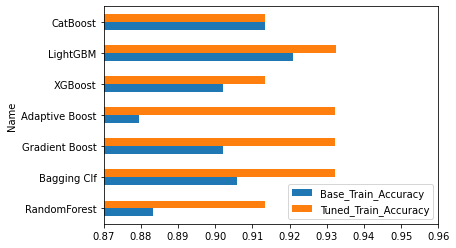

In [117]:
df_summary.plot.barh(x='Name',y=['Base_Train_Accuracy','Tuned_Train_Accuracy'])
plt.xlim(0.87,0.96)